### 検証10  
lightbgmの精度が良かったので、lightbgmでoputunaを回して分析する。

ライブラリのインストール

In [20]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

#optunaインポート
import optuna.integration.lightgbm as lgb
import optuna
import optuna.integration.lightgbm as opt_lgb
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
import sklearn.datasets

# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')

In [21]:
#前処理

#trainデータ処理
train_df = pd.read_table('train.tsv')
#One-Hot Encoding
train_df_one_hot_encoded = pd.get_dummies(train_df,columns=['weathersit'])
#曜日の'weekday'を土日(0)と平日(1)の2値データする。
#新しい変数'weekday2'を作って、全て0(zero)を入れる
train_df_one_hot_encoded['weekday2'] = 0
#平日を1にしたいので、1にするコードを用意する
train_df_one_hot_encoded.loc[train_df_one_hot_encoded['weekday'].isin(list(range(1,6))),'weekday2']=1
# 結果の件数を確認する
#train_df_one_hot_encoded['weekday2'].value_counts()
# id2500以前は、傾向が違うため、カット(運用開始など？)
train_df_one_hot_encoded = train_df_one_hot_encoded[train_df_one_hot_encoded['id'] > 2500]


#testデータ処理
test_df = pd.read_table('test.tsv')
#One-Hot Encoding
test_df_one_hot_encoded = pd.get_dummies(test_df,columns=['weathersit'])
#曜日の'weekday'を土日(0)と平日(1)の2値データする。
#新しい変数'weekday2'を作って、全て0(zero)を入れる
test_df_one_hot_encoded['weekday2'] = 0
#平日を1にしたいので、1にするコードを用意する
test_df_one_hot_encoded.loc[test_df_one_hot_encoded['weekday'].isin(list(range(1,6))),'weekday2']=1


In [22]:
#必要な説明変数だけをとりだす
train_df_x = train_df_one_hot_encoded[['hr','workingday','weekday2','temp','atemp','weathersit_1','weathersit_2','weathersit_3']]
train_df_y = train_df_one_hot_encoded['cnt']
train_df_x.head()

,hr,workingday,weekday2,temp,atemp,weathersit_1,weathersit_2,weathersit_3
2500,2,1,1,0.46,0.4545,1,0,0
2501,3,1,1,0.48,0.4697,1,0,0
2502,4,1,1,0.46,0.4545,1,0,0
2503,5,1,1,0.46,0.4545,0,1,0
2504,6,1,1,0.48,0.4697,0,1,0


In [25]:
# defaultはtrain dataが75%、test dataが25%に分割
# また時系列のデータなので、shuffleをFalseにする。
X_train, X_test, y_train, y_test = train_test_split(train_df_x, train_df_y, random_state=42, shuffle=False)


In [31]:
#モデル構築
trains = lgb.Dataset(train_X, train_y)
valids = lgb.Dataset(test_X, test_y)

params = {
    'objective': 'regression_l1',
    'metric': 'mae',
    'max_depth': -1,
    'subsample_freq': 1,
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round":7000,
    "early_stopping_rounds": 100,
    'num_leaves': 3471,
    'feature_fraction': 0.5718461362837146,
    'bagging_fraction': 0.877025059209037,
    'min_data_in_leaf': 19,
    'lambda_l1': 0.4623075278206704,
    'lambda_l2': 11.471777121126554
}

model = lgb.train(params, trains,  valid_sets = [trains, valids], keep_training_booster = True, verbose_eval =100)


[I 2022-12-02 12:14:44,335] A new study created in memory with name: no-name-abb182ec-dcca-47e9-ac53-d0336f5394ac
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 70.525	valid_1's l1: 66.6716
[200]	valid_0's l1: 47.6013	valid_1's l1: 52.2089
[300]	valid_0's l1: 34.1028	valid_1's l1: 43.9463
[400]	valid_0's l1: 27.9194	valid_1's l1: 41.2159
[500]	valid_0's l1: 25.4624	valid_1's l1: 40.6137
[600]	valid_0's l1: 24.0637	valid_1's l1: 40.0975
[700]	valid_0's l1: 23.3243	valid_1's l1: 39.9752


feature_fraction, val_score: 39.956334:  14%|#4        | 1/7 [00:04<00:25,  4.23s/it]

[800]	valid_0's l1: 22.8188	valid_1's l1: 40.056
Early stopping, best iteration is:
[704]	valid_0's l1: 23.3009	valid_1's l1: 39.9563
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 73.6048	valid_1's l1: 66.3647
[200]	valid_0's l1: 50.3551	valid_1's l1: 50.4224
[300]	valid_0's l1: 37.8571	valid_1's l1: 43.5101
[400]	valid_0's l1: 31.6647	valid_1's l1: 40.7348
[500]	valid_0's l1: 28.6341	valid_1's l1: 39.6459
[600]	valid_0's l1: 26.0975	valid_1's l1: 38.7375
[700]	valid_0's l1: 24.922	valid_1's l1: 38.499
[800]	valid_0's l1: 24.115	valid_1's l1: 38.4494
[900]	valid_0's l1: 23.454	valid_1's l1: 38.4348
Early stopping, best iteration is:
[828]	valid_0's l1: 23.9166	valid_1's l1: 38.3936


feature_fraction, val_score: 38.393634:  29%|##8       | 2/7 [00:08<00:20,  4.05s/it]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.1504	valid_1's l1: 67.1664
[200]	valid_0's l1: 43.4331	valid_1's l1: 52.8815
[300]	valid_0's l1: 31.2245	valid_1's l1: 44.2009
[400]	valid_0's l1: 25.9279	valid_1's l1: 40.7258
[500]	valid_0's l1: 24.0875	valid_1's l1: 39.5512
[600]	valid_0's l1: 23.2714	valid_1's l1: 38.9951
[700]	valid_0's l1: 22.7328	valid_1's l1: 38.8384
[800]	valid_0's l1: 22.2615	valid_1's l1: 38.7937
[900]	valid_0's l1: 21.9217	valid_1's l1: 38.7675


feature_fraction, val_score: 38.393634:  43%|####2     | 3/7 [00:14<00:20,  5.00s/it]

Early stopping, best iteration is:
[878]	valid_0's l1: 21.9901	valid_1's l1: 38.7425
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 78.2829	valid_1's l1: 67.7129
[200]	valid_0's l1: 54.4526	valid_1's l1: 50.0084
[300]	valid_0's l1: 41.2873	valid_1's l1: 43.2594
[400]	valid_0's l1: 33.7439	valid_1's l1: 39.8683
[500]	valid_0's l1: 30.1361	valid_1's l1: 38.9779
[600]	valid_0's l1: 27.5163	valid_1's l1: 38.4747
[700]	valid_0's l1: 25.907	valid_1's l1: 38.1858
[800]	valid_0's l1: 24.8604	valid_1's l1: 38.0265
[900]	valid_0's l1: 24.2229	valid_1's l1: 38.0009


feature_fraction, val_score: 37.987238:  57%|#####7    | 4/7 [00:20<00:16,  5.45s/it]

Early stopping, best iteration is:
[883]	valid_0's l1: 24.3412	valid_1's l1: 37.9872
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9625	valid_1's l1: 37.3175
[800]	valid_0's l1: 25.1076	valid_1's l1: 37.2628
[900]	valid_0's l1: 24.4927	valid_1's l1: 37.2244


feature_fraction, val_score: 37.218267:  71%|#######1  | 5/7 [00:25<00:10,  5.16s/it]

Early stopping, best iteration is:
[894]	valid_0's l1: 24.521	valid_1's l1: 37.2183
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 73.6048	valid_1's l1: 66.3647
[200]	valid_0's l1: 50.3551	valid_1's l1: 50.4224
[300]	valid_0's l1: 37.8571	valid_1's l1: 43.5101
[400]	valid_0's l1: 31.6647	valid_1's l1: 40.7348
[500]	valid_0's l1: 28.6341	valid_1's l1: 39.6459
[600]	valid_0's l1: 26.0975	valid_1's l1: 38.7375
[700]	valid_0's l1: 24.922	valid_1's l1: 38.499
[800]	valid_0's l1: 24.115	valid_1's l1: 38.4494


feature_fraction, val_score: 37.218267:  86%|########5 | 6/7 [00:29<00:04,  4.98s/it]

[900]	valid_0's l1: 23.454	valid_1's l1: 38.4348
Early stopping, best iteration is:
[828]	valid_0's l1: 23.9166	valid_1's l1: 38.3936


[I 2022-12-02 12:15:14,108] Trial 5 finished with value: 38.39363443928886 and parameters: {'feature_fraction': 0.8}. Best is trial 4 with value: 37.21826683121242.
feature_fraction, val_score: 37.218267:  86%|########5 | 6/7 [00:29<00:04,  4.98s/it]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 89.8258	valid_1's l1: 73.8015
[200]	valid_0's l1: 73.9881	valid_1's l1: 60.4452
[300]	valid_0's l1: 61.7249	valid_1's l1: 52.5222
[400]	valid_0's l1: 53.6968	valid_1's l1: 48.3141
[500]	valid_0's l1: 48.19	valid_1's l1: 46.0934
[600]	valid_0's l1: 43.3439	valid_1's l1: 44.1832
[700]	valid_0's l1: 40.3648	valid_1's l1: 42.7064
[800]	valid_0's l1: 36.8404	valid_1's l1: 40.9476
[900]	valid_0's l1: 34.0528	valid_1's l1: 39.6108
[1000]	valid_0's l1: 32.1032	valid_1's l1: 38.8217
[1100]	valid_0's l1: 30.7633	valid_1's l1: 38.3238
[1200]	valid_0's l1: 29.7742	valid_1's l1: 38.0991
[1300]	valid_0's l1: 28.8849	valid_1's l1: 37.9359
[1400]	valid_0's l1: 28.0941	valid_1's l1: 37.6935
[1500]	valid_0's l1: 27.4135	valid_1's l1: 37.5507
[1600]	valid_0's l1: 26.844	valid_1's l1: 37.4126
[1700]	valid_0's l1: 26.3917	valid_1's l1: 37.3087


feature_fraction, val_score: 37.218267: 100%|##########| 7/7 [00:37<00:00,  5.42s/it]


Early stopping, best iteration is:
[1685]	valid_0's l1: 26.438	valid_1's l1: 37.2907


num_leaves, val_score: 37.218267:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.419	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.2737	valid_1's l1: 37.6426
[700]	valid_0's l1: 25.8882	valid_1's l1: 37.3015
[800]	valid_0's l1: 25.076	valid_1's l1: 37.2899
[900]	valid_0's l1: 24.47	valid_1's l1: 37.272


num_leaves, val_score: 37.218267:   5%|5         | 1/20 [00:03<01:07,  3.53s/it]

Early stopping, best iteration is:
[895]	valid_0's l1: 24.4934	valid_1's l1: 37.2556
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5971	valid_1's l1: 50.2418
[300]	valid_0's l1: 39.4785	valid_1's l1: 42.9909
[400]	valid_0's l1: 33.4891	valid_1's l1: 39.8251
[500]	valid_0's l1: 30.36	valid_1's l1: 38.5704
[600]	valid_0's l1: 27.9242	valid_1's l1: 37.7841
[700]	valid_0's l1: 26.4455	valid_1's l1: 37.3479
[800]	valid_0's l1: 25.5952	valid_1's l1: 37.1708


num_leaves, val_score: 37.134760:  10%|#         | 2/20 [00:05<00:48,  2.68s/it]

[900]	valid_0's l1: 24.9377	valid_1's l1: 37.1656
Early stopping, best iteration is:
[809]	valid_0's l1: 25.4997	valid_1's l1: 37.1348
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5587	valid_1's l1: 50.2197
[300]	valid_0's l1: 39.4088	valid_1's l1: 43.0809
[400]	valid_0's l1: 33.0659	valid_1's l1: 39.8019
[500]	valid_0's l1: 30.0059	valid_1's l1: 38.5257
[600]	valid_0's l1: 27.7627	valid_1's l1: 37.8469
[700]	valid_0's l1: 26.3654	valid_1's l1: 37.4446
[800]	valid_0's l1: 25.489	valid_1's l1: 37.3213


num_leaves, val_score: 37.134760:  15%|#5        | 3/20 [00:07<00:41,  2.43s/it]

[900]	valid_0's l1: 24.8579	valid_1's l1: 37.3002
Early stopping, best iteration is:
[883]	valid_0's l1: 24.9356	valid_1's l1: 37.2786
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.2881	valid_1's l1: 67.0041
[200]	valid_0's l1: 51.3139	valid_1's l1: 50.3093
[300]	valid_0's l1: 39.9691	valid_1's l1: 43.0419
[400]	valid_0's l1: 34.7346	valid_1's l1: 40.2519
[500]	valid_0's l1: 31.568	valid_1's l1: 38.979
[600]	valid_0's l1: 29.3478	valid_1's l1: 38.0675
[700]	valid_0's l1: 27.9897	valid_1's l1: 37.5567
[800]	valid_0's l1: 27.1459	valid_1's l1: 37.42
[900]	valid_0's l1: 26.4688	valid_1's l1: 37.2299
[1000]	valid_0's l1: 25.8849	valid_1's l1: 37.1763


num_leaves, val_score: 37.134760:  20%|##        | 4/20 [00:09<00:35,  2.21s/it]

[1100]	valid_0's l1: 25.5316	valid_1's l1: 37.2002
Early stopping, best iteration is:
[1036]	valid_0's l1: 25.7399	valid_1's l1: 37.137
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9737	valid_1's l1: 37.3152
[800]	valid_0's l1: 25.0895	valid_1's l1: 37.264


num_leaves, val_score: 37.134760:  25%|##5       | 5/20 [00:12<00:38,  2.59s/it]

[900]	valid_0's l1: 24.4831	valid_1's l1: 37.3189
Early stopping, best iteration is:
[809]	valid_0's l1: 25.014	valid_1's l1: 37.2486
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0081	valid_1's l1: 66.9457
[200]	valid_0's l1: 50.7167	valid_1's l1: 50.2778
[300]	valid_0's l1: 40.2418	valid_1's l1: 43.5367
[400]	valid_0's l1: 33.7402	valid_1's l1: 39.9218
[500]	valid_0's l1: 30.8518	valid_1's l1: 39.0019
[600]	valid_0's l1: 28.5244	valid_1's l1: 38.1438
[700]	valid_0's l1: 26.9956	valid_1's l1: 37.6964
[800]	valid_0's l1: 26.0211	valid_1's l1: 37.3952
[900]	valid_0's l1: 25.3442	valid_1's l1: 37.3014


num_leaves, val_score: 37.134760:  30%|###       | 6/20 [00:15<00:36,  2.58s/it]

[1000]	valid_0's l1: 24.8521	valid_1's l1: 37.3056
Early stopping, best iteration is:
[932]	valid_0's l1: 25.1574	valid_1's l1: 37.2777
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.6601	valid_1's l1: 50.2604
[300]	valid_0's l1: 40.116	valid_1's l1: 43.5804
[400]	valid_0's l1: 33.8785	valid_1's l1: 40.2687
[500]	valid_0's l1: 30.599	valid_1's l1: 38.9224
[600]	valid_0's l1: 28.3693	valid_1's l1: 38.1706
[700]	valid_0's l1: 26.7787	valid_1's l1: 37.6918
[800]	valid_0's l1: 25.7537	valid_1's l1: 37.503


num_leaves, val_score: 37.134760:  35%|###5      | 7/20 [00:18<00:33,  2.57s/it]

[900]	valid_0's l1: 25.0912	valid_1's l1: 37.4677
Early stopping, best iteration is:
[871]	valid_0's l1: 25.2645	valid_1's l1: 37.448
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9625	valid_1's l1: 37.3175
[800]	valid_0's l1: 25.1076	valid_1's l1: 37.2628
[900]	valid_0's l1: 24.4927	valid_1's l1: 37.2244


num_leaves, val_score: 37.134760:  40%|####      | 8/20 [00:20<00:31,  2.59s/it]

Early stopping, best iteration is:
[894]	valid_0's l1: 24.521	valid_1's l1: 37.2183
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.2183	valid_1's l1: 42.9617
[400]	valid_0's l1: 32.5306	valid_1's l1: 39.4521
[500]	valid_0's l1: 29.1938	valid_1's l1: 38.2637
[600]	valid_0's l1: 27.2009	valid_1's l1: 37.6877
[700]	valid_0's l1: 25.8661	valid_1's l1: 37.3651
[800]	valid_0's l1: 25.1032	valid_1's l1: 37.3106
[900]	valid_0's l1: 24.5608	valid_1's l1: 37.2733


num_leaves, val_score: 37.134760:  45%|####5     | 9/20 [00:22<00:26,  2.39s/it]

[1000]	valid_0's l1: 24.0963	valid_1's l1: 37.2647
Early stopping, best iteration is:
[938]	valid_0's l1: 24.3464	valid_1's l1: 37.2522
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.6256	valid_1's l1: 50.2475
[300]	valid_0's l1: 39.4071	valid_1's l1: 42.9653
[400]	valid_0's l1: 32.8213	valid_1's l1: 39.5493
[500]	valid_0's l1: 29.8656	valid_1's l1: 38.498
[600]	valid_0's l1: 27.8532	valid_1's l1: 37.8326
[700]	valid_0's l1: 26.4017	valid_1's l1: 37.399
[800]	valid_0's l1: 25.591	valid_1's l1: 37.257
[900]	valid_0's l1: 24.9617	valid_1's l1: 37.217
[1000]	valid_0's l1: 24.5119	valid_1's l1: 37.2181
Early stopping, best iteration is:
[919]	valid_0's l1: 24.8643	valid_1's l1: 37.1974


num_leaves, val_score: 37.134760:  50%|#####     | 10/20 [00:24<00:22,  2.23s/it]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9625	valid_1's l1: 37.3175
[800]	valid_0's l1: 25.1076	valid_1's l1: 37.2628
[900]	valid_0's l1: 24.4927	valid_1's l1: 37.2244


num_leaves, val_score: 37.134760:  55%|#####5    | 11/20 [00:27<00:22,  2.55s/it]

Early stopping, best iteration is:
[894]	valid_0's l1: 24.521	valid_1's l1: 37.2183
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 79.4434	valid_1's l1: 71.068
[200]	valid_0's l1: 66.1008	valid_1's l1: 61.9713
[300]	valid_0's l1: 61.1335	valid_1's l1: 59.4573
[400]	valid_0's l1: 58.6309	valid_1's l1: 59.0733
[500]	valid_0's l1: 56.0806	valid_1's l1: 58.4695
[600]	valid_0's l1: 52.5167	valid_1's l1: 57.6709
[700]	valid_0's l1: 50.5628	valid_1's l1: 57.151
[800]	valid_0's l1: 48.6791	valid_1's l1: 56.8486
[900]	valid_0's l1: 47.0709	valid_1's l1: 56.5136
[1000]	valid_0's l1: 46.0162	valid_1's l1: 56.4176
[1100]	valid_0's l1: 45.0055	valid_1's l1: 56.0973
[1200]	valid_0's l1: 43.7156	valid_1's l1: 55.226
[1300]	valid_0's l1: 42.758	valid_1's l1: 54.4373
[1400]	valid_0's l1: 41.8815	valid_1's l1: 53.5463
[1500]	valid_0's l1: 40.8442	valid_1's l1: 52.8104
[1600]	valid_0's l1: 39.4119	valid_1's l1: 51.1663
[1700]	valid_0's l1: 38.2366	valid_1's l1: 49.9058


num_leaves, val_score: 37.134760:  60%|######    | 12/20 [00:31<00:24,  3.00s/it]

[6100]	valid_0's l1: 26.7591	valid_1's l1: 38.4082
Early stopping, best iteration is:
[6036]	valid_0's l1: 26.7922	valid_1's l1: 38.376
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 77.9195	valid_1's l1: 69.8736
[200]	valid_0's l1: 63.1084	valid_1's l1: 60.1706
[300]	valid_0's l1: 57.3779	valid_1's l1: 57.6295
[400]	valid_0's l1: 53.4302	valid_1's l1: 56.333
[500]	valid_0's l1: 50.4024	valid_1's l1: 55.1911
[600]	valid_0's l1: 47.411	valid_1's l1: 53.6956
[700]	valid_0's l1: 44.9182	valid_1's l1: 52.5426
[800]	valid_0's l1: 42.3484	valid_1's l1: 51.0691
[900]	valid_0's l1: 40.1605	valid_1's l1: 49.9001
[1000]	valid_0's l1: 38.138	valid_1's l1: 48.2518
[1100]	valid_0's l1: 36.4086	valid_1's l1: 47.2798
[1200]	valid_0's l1: 34.8962	valid_1's l1: 46.3373
[1300]	valid_0's l1: 33.3397	valid_1's l1: 45.2493
[1400]	valid_0's l1: 32.4416	valid_1's l1: 44.704
[1500]	valid_0's l1: 31.4961	valid_1's l1: 44.0769
[1600]	valid_0's l1: 30.8864	valid_1's l1: 43.6005

num_leaves, val_score: 37.134760:  65%|######5   | 13/20 [00:34<00:21,  3.04s/it]

[4100]	valid_0's l1: 26.1146	valid_1's l1: 38.0434
Early stopping, best iteration is:
[4050]	valid_0's l1: 26.1421	valid_1's l1: 38.0175
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9625	valid_1's l1: 37.3175
[800]	valid_0's l1: 25.1076	valid_1's l1: 37.2628
[900]	valid_0's l1: 24.4927	valid_1's l1: 37.2244


num_leaves, val_score: 37.134760:  70%|#######   | 14/20 [00:37<00:16,  2.81s/it]

Early stopping, best iteration is:
[894]	valid_0's l1: 24.521	valid_1's l1: 37.2183
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.2881	valid_1's l1: 67.0041
[200]	valid_0's l1: 51.3139	valid_1's l1: 50.3093
[300]	valid_0's l1: 39.9691	valid_1's l1: 43.0419
[400]	valid_0's l1: 34.7346	valid_1's l1: 40.2519
[500]	valid_0's l1: 31.568	valid_1's l1: 38.979
[600]	valid_0's l1: 29.3478	valid_1's l1: 38.0675
[700]	valid_0's l1: 27.9897	valid_1's l1: 37.5567
[800]	valid_0's l1: 27.1459	valid_1's l1: 37.42
[900]	valid_0's l1: 26.4688	valid_1's l1: 37.2299


num_leaves, val_score: 37.134760:  75%|#######5  | 15/20 [00:38<00:12,  2.41s/it]

[1000]	valid_0's l1: 25.8849	valid_1's l1: 37.1763
[1100]	valid_0's l1: 25.5316	valid_1's l1: 37.2002
Early stopping, best iteration is:
[1036]	valid_0's l1: 25.7399	valid_1's l1: 37.137
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5565	valid_1's l1: 39.4392
[500]	valid_0's l1: 29.4048	valid_1's l1: 38.2375
[600]	valid_0's l1: 27.3025	valid_1's l1: 37.578
[700]	valid_0's l1: 25.9455	valid_1's l1: 37.2382


num_leaves, val_score: 37.134760:  80%|########  | 16/20 [00:40<00:08,  2.18s/it]

[800]	valid_0's l1: 25.1407	valid_1's l1: 37.2609
Early stopping, best iteration is:
[744]	valid_0's l1: 25.5906	valid_1's l1: 37.2363
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9625	valid_1's l1: 37.3175
[800]	valid_0's l1: 25.1076	valid_1's l1: 37.2628
[900]	valid_0's l1: 24.4927	valid_1's l1: 37.2244


num_leaves, val_score: 37.134760:  85%|########5 | 17/20 [00:43<00:07,  2.46s/it]

Early stopping, best iteration is:
[894]	valid_0's l1: 24.521	valid_1's l1: 37.2183
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.1533	valid_1's l1: 66.9317
[200]	valid_0's l1: 50.8904	valid_1's l1: 50.0362
[300]	valid_0's l1: 40.2463	valid_1's l1: 43.2133
[400]	valid_0's l1: 34.5347	valid_1's l1: 39.9958
[500]	valid_0's l1: 31.3784	valid_1's l1: 38.6061
[600]	valid_0's l1: 29.179	valid_1's l1: 37.8142
[700]	valid_0's l1: 27.6587	valid_1's l1: 37.3487
[800]	valid_0's l1: 26.6733	valid_1's l1: 37.185
[900]	valid_0's l1: 25.9951	valid_1's l1: 37.0795


num_leaves, val_score: 37.029213:  90%|######### | 18/20 [00:45<00:04,  2.24s/it]

[1000]	valid_0's l1: 25.4497	valid_1's l1: 37.0295
Early stopping, best iteration is:
[988]	valid_0's l1: 25.4923	valid_1's l1: 37.0292
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0834	valid_1's l1: 42.8676
[400]	valid_0's l1: 32.6884	valid_1's l1: 39.5617
[500]	valid_0's l1: 29.4807	valid_1's l1: 38.4439
[600]	valid_0's l1: 27.4552	valid_1's l1: 37.8066
[700]	valid_0's l1: 25.9562	valid_1's l1: 37.4103
[800]	valid_0's l1: 25.1722	valid_1's l1: 37.293


num_leaves, val_score: 37.029213:  95%|#########5| 19/20 [00:47<00:02,  2.13s/it]

[900]	valid_0's l1: 24.6288	valid_1's l1: 37.306
Early stopping, best iteration is:
[852]	valid_0's l1: 24.8598	valid_1's l1: 37.2603
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.0005	valid_1's l1: 66.9537
[200]	valid_0's l1: 50.5642	valid_1's l1: 50.2408
[300]	valid_0's l1: 39.0824	valid_1's l1: 42.8675
[400]	valid_0's l1: 32.5596	valid_1's l1: 39.447
[500]	valid_0's l1: 29.4189	valid_1's l1: 38.2843
[600]	valid_0's l1: 27.374	valid_1's l1: 37.6818
[700]	valid_0's l1: 25.9625	valid_1's l1: 37.3175
[800]	valid_0's l1: 25.1076	valid_1's l1: 37.2628
[900]	valid_0's l1: 24.4927	valid_1's l1: 37.2244


num_leaves, val_score: 37.029213: 100%|##########| 20/20 [00:49<00:00,  2.46s/it]


Early stopping, best iteration is:
[894]	valid_0's l1: 24.521	valid_1's l1: 37.2183


bagging, val_score: 37.029213:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 73.653	valid_1's l1: 66.5551
[200]	valid_0's l1: 53.4779	valid_1's l1: 52.0944
[300]	valid_0's l1: 41.9191	valid_1's l1: 44.9197
[400]	valid_0's l1: 35.5417	valid_1's l1: 41.2824
[500]	valid_0's l1: 32.153	valid_1's l1: 39.4644
[600]	valid_0's l1: 30.1641	valid_1's l1: 38.6008
[700]	valid_0's l1: 28.3858	valid_1's l1: 37.8368
[800]	valid_0's l1: 27.4741	valid_1's l1: 37.5145
[900]	valid_0's l1: 26.7197	valid_1's l1: 37.4666


bagging, val_score: 37.029213:  10%|#         | 1/10 [00:01<00:11,  1.24s/it]

Early stopping, best iteration is:
[891]	valid_0's l1: 26.7976	valid_1's l1: 37.4077
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 73.8097	valid_1's l1: 66.7038
[200]	valid_0's l1: 53.3346	valid_1's l1: 52.0781
[300]	valid_0's l1: 41.4246	valid_1's l1: 44.3961
[400]	valid_0's l1: 34.5868	valid_1's l1: 40.7896
[500]	valid_0's l1: 31.3768	valid_1's l1: 39.053
[600]	valid_0's l1: 29.2461	valid_1's l1: 38.0805
[700]	valid_0's l1: 28.0391	valid_1's l1: 37.6311
[800]	valid_0's l1: 27.261	valid_1's l1: 37.2373
[900]	valid_0's l1: 26.6132	valid_1's l1: 37.1826
[1000]	valid_0's l1: 26.1773	valid_1's l1: 37.1838
[1100]	valid_0's l1: 25.7978	valid_1's l1: 37.1878
[1200]	valid_0's l1: 25.5317	valid_1's l1: 37.0448
[1300]	valid_0's l1: 25.3068	valid_1's l1: 36.9377
[1400]	valid_0's l1: 25.1266	valid_1's l1: 36.8333


bagging, val_score: 36.827132:  20%|##        | 2/10 [00:03<00:12,  1.55s/it]

Early stopping, best iteration is:
[1374]	valid_0's l1: 25.1634	valid_1's l1: 36.8271
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.522	valid_1's l1: 67.4243
[200]	valid_0's l1: 51.0257	valid_1's l1: 50.389
[300]	valid_0's l1: 40.3548	valid_1's l1: 43.664
[400]	valid_0's l1: 34.1006	valid_1's l1: 40.2951
[500]	valid_0's l1: 30.7112	valid_1's l1: 38.8285
[600]	valid_0's l1: 28.8731	valid_1's l1: 38.2407
[700]	valid_0's l1: 27.5219	valid_1's l1: 37.7418
[800]	valid_0's l1: 26.7224	valid_1's l1: 37.4135
[900]	valid_0's l1: 26.1965	valid_1's l1: 37.0799
[1000]	valid_0's l1: 25.6927	valid_1's l1: 36.9152
[1100]	valid_0's l1: 25.3918	valid_1's l1: 36.8074
[1200]	valid_0's l1: 25.1377	valid_1's l1: 36.7494


bagging, val_score: 36.734121:  30%|###       | 3/10 [00:04<00:11,  1.60s/it]

[1300]	valid_0's l1: 24.9148	valid_1's l1: 36.8204
Early stopping, best iteration is:
[1206]	valid_0's l1: 25.1193	valid_1's l1: 36.7341
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 73.7307	valid_1's l1: 66.4972
[200]	valid_0's l1: 52.7961	valid_1's l1: 51.3953
[300]	valid_0's l1: 41.0261	valid_1's l1: 44.017
[400]	valid_0's l1: 34.4107	valid_1's l1: 40.6594
[500]	valid_0's l1: 31.0698	valid_1's l1: 38.9149
[600]	valid_0's l1: 29.3104	valid_1's l1: 38.1037
[700]	valid_0's l1: 28.1764	valid_1's l1: 37.7421
[800]	valid_0's l1: 27.2353	valid_1's l1: 37.2388


bagging, val_score: 36.734121:  40%|####      | 4/10 [00:05<00:08,  1.42s/it]

[900]	valid_0's l1: 26.6167	valid_1's l1: 37.2383
Early stopping, best iteration is:
[815]	valid_0's l1: 27.1266	valid_1's l1: 37.1992
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 73.9972	valid_1's l1: 66.429
[200]	valid_0's l1: 51.1805	valid_1's l1: 50.1669
[300]	valid_0's l1: 40.5134	valid_1's l1: 43.5582
[400]	valid_0's l1: 33.9151	valid_1's l1: 39.6786
[500]	valid_0's l1: 30.617	valid_1's l1: 38.0696
[600]	valid_0's l1: 28.8376	valid_1's l1: 37.5447
[700]	valid_0's l1: 27.6951	valid_1's l1: 37.3047
[800]	valid_0's l1: 26.9239	valid_1's l1: 37.1902
[900]	valid_0's l1: 26.3149	valid_1's l1: 37.0027
[1000]	valid_0's l1: 25.8072	valid_1's l1: 36.9424
Early stopping, best iteration is:
[960]	valid_0's l1: 25.9697	valid_1's l1: 36.9189


bagging, val_score: 36.734121:  50%|#####     | 5/10 [00:07<00:06,  1.39s/it]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.5151	valid_1's l1: 66.8951
[200]	valid_0's l1: 53.3826	valid_1's l1: 51.7867
[300]	valid_0's l1: 42.1584	valid_1's l1: 44.6603
[400]	valid_0's l1: 35.4509	valid_1's l1: 41.0608
[500]	valid_0's l1: 31.954	valid_1's l1: 39.4626
[600]	valid_0's l1: 29.5224	valid_1's l1: 38.0785
[700]	valid_0's l1: 28.2678	valid_1's l1: 37.6728
[800]	valid_0's l1: 27.6201	valid_1's l1: 37.535
[900]	valid_0's l1: 27.0198	valid_1's l1: 37.3112
[1000]	valid_0's l1: 26.4	valid_1's l1: 37.0215


bagging, val_score: 36.734121:  60%|######    | 6/10 [00:09<00:06,  1.67s/it]

Early stopping, best iteration is:
[990]	valid_0's l1: 26.4739	valid_1's l1: 36.9894
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.2111	valid_1's l1: 66.8492
[200]	valid_0's l1: 50.8657	valid_1's l1: 50.023
[300]	valid_0's l1: 40.073	valid_1's l1: 43.2316
[400]	valid_0's l1: 33.8977	valid_1's l1: 40.2025
[500]	valid_0's l1: 30.8611	valid_1's l1: 38.8283
[600]	valid_0's l1: 28.6397	valid_1's l1: 37.9906
[700]	valid_0's l1: 27.284	valid_1's l1: 37.5007
[800]	valid_0's l1: 26.5024	valid_1's l1: 37.3912


bagging, val_score: 36.734121:  70%|#######   | 7/10 [00:11<00:05,  1.70s/it]

[900]	valid_0's l1: 25.9145	valid_1's l1: 37.3948
Early stopping, best iteration is:
[831]	valid_0's l1: 26.2799	valid_1's l1: 37.3184
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.3227	valid_1's l1: 66.9013
[200]	valid_0's l1: 51.6829	valid_1's l1: 50.7157
[300]	valid_0's l1: 40.678	valid_1's l1: 43.649
[400]	valid_0's l1: 33.224	valid_1's l1: 39.832
[500]	valid_0's l1: 29.9686	valid_1's l1: 38.7216
[600]	valid_0's l1: 27.9432	valid_1's l1: 37.9356
[700]	valid_0's l1: 27.01	valid_1's l1: 37.6731
[800]	valid_0's l1: 26.2818	valid_1's l1: 37.502
[900]	valid_0's l1: 25.7892	valid_1's l1: 37.4634
[1000]	valid_0's l1: 25.429	valid_1's l1: 37.1892
[1100]	valid_0's l1: 25.136	valid_1's l1: 37.2322


bagging, val_score: 36.734121:  80%|########  | 8/10 [00:12<00:03,  1.62s/it]

Early stopping, best iteration is:
[1070]	valid_0's l1: 25.2295	valid_1's l1: 37.1435
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.6494	valid_1's l1: 67.4872
[200]	valid_0's l1: 53.5597	valid_1's l1: 51.9022
[300]	valid_0's l1: 41.7556	valid_1's l1: 44.5258
[400]	valid_0's l1: 35.1402	valid_1's l1: 40.9759
[500]	valid_0's l1: 31.554	valid_1's l1: 39.1388
[600]	valid_0's l1: 28.922	valid_1's l1: 37.8013
[700]	valid_0's l1: 27.6037	valid_1's l1: 37.1165
[800]	valid_0's l1: 27.024	valid_1's l1: 37.0427
[900]	valid_0's l1: 26.4685	valid_1's l1: 36.886
[1000]	valid_0's l1: 26.0469	valid_1's l1: 36.6557
[1100]	valid_0's l1: 25.7667	valid_1's l1: 36.5936


bagging, val_score: 36.497670:  90%|######### | 9/10 [00:14<00:01,  1.61s/it]

[1200]	valid_0's l1: 25.4741	valid_1's l1: 36.5357
[1300]	valid_0's l1: 25.2747	valid_1's l1: 36.6025
Early stopping, best iteration is:
[1209]	valid_0's l1: 25.4509	valid_1's l1: 36.4977
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.3826	valid_1's l1: 66.9987
[200]	valid_0's l1: 50.7426	valid_1's l1: 49.574
[300]	valid_0's l1: 39.4544	valid_1's l1: 42.5987
[400]	valid_0's l1: 33.5344	valid_1's l1: 39.9534
[500]	valid_0's l1: 30.133	valid_1's l1: 38.5751
[600]	valid_0's l1: 28.1284	valid_1's l1: 37.9191
[700]	valid_0's l1: 26.9939	valid_1's l1: 37.5687
[800]	valid_0's l1: 26.3152	valid_1's l1: 37.2663


bagging, val_score: 36.497670: 100%|##########| 10/10 [00:15<00:00,  1.54s/it]


[900]	valid_0's l1: 25.7468	valid_1's l1: 37.2113
Early stopping, best iteration is:
[861]	valid_0's l1: 25.9417	valid_1's l1: 37.1904


feature_fraction_stage2, val_score: 36.497670:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.6494	valid_1's l1: 67.4872
[200]	valid_0's l1: 53.5597	valid_1's l1: 51.9022
[300]	valid_0's l1: 41.7556	valid_1's l1: 44.5258
[400]	valid_0's l1: 35.1402	valid_1's l1: 40.9759
[500]	valid_0's l1: 31.554	valid_1's l1: 39.1388
[600]	valid_0's l1: 28.922	valid_1's l1: 37.8013
[700]	valid_0's l1: 27.6037	valid_1's l1: 37.1165
[800]	valid_0's l1: 27.024	valid_1's l1: 37.0427
[900]	valid_0's l1: 26.4685	valid_1's l1: 36.886
[1000]	valid_0's l1: 26.0469	valid_1's l1: 36.6557
[1100]	valid_0's l1: 25.7667	valid_1's l1: 36.5936
[1200]	valid_0's l1: 25.4741	valid_1's l1: 36.5357


feature_fraction_stage2, val_score: 36.497670:  17%|#6        | 1/6 [00:01<00:08,  1.60s/it]

[1300]	valid_0's l1: 25.2747	valid_1's l1: 36.6025
Early stopping, best iteration is:
[1209]	valid_0's l1: 25.4509	valid_1's l1: 36.4977
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 90.3178	valid_1's l1: 74.3568
[200]	valid_0's l1: 74.4676	valid_1's l1: 60.4094
[300]	valid_0's l1: 62.5623	valid_1's l1: 52.1075
[400]	valid_0's l1: 55.8808	valid_1's l1: 48.9058
[500]	valid_0's l1: 50.0197	valid_1's l1: 46.496
[600]	valid_0's l1: 44.6119	valid_1's l1: 44.2641
[700]	valid_0's l1: 41.6474	valid_1's l1: 42.8472
[800]	valid_0's l1: 38.1098	valid_1's l1: 41.0418
[900]	valid_0's l1: 35.4323	valid_1's l1: 40.037
[1000]	valid_0's l1: 33.4771	valid_1's l1: 39.4068
[1100]	valid_0's l1: 32.2456	valid_1's l1: 38.9762
[1200]	valid_0's l1: 31.3077	valid_1's l1: 38.7601
[1300]	valid_0's l1: 30.4726	valid_1's l1: 38.5429
[1400]	valid_0's l1: 29.7735	valid_1's l1: 38.4437
[1500]	valid_0's l1: 29.0839	valid_1's l1: 38.1711
[1600]	valid_0's l1: 28.5375	valid_1's l1: 38.1

feature_fraction_stage2, val_score: 36.497670:  33%|###3      | 2/6 [00:04<00:08,  2.12s/it]

[2200]	valid_0's l1: 26.6104	valid_1's l1: 37.7097
Early stopping, best iteration is:
[2102]	valid_0's l1: 26.8409	valid_1's l1: 37.6599
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.6494	valid_1's l1: 67.4872
[200]	valid_0's l1: 53.5597	valid_1's l1: 51.9022
[300]	valid_0's l1: 41.7556	valid_1's l1: 44.5258
[400]	valid_0's l1: 35.1402	valid_1's l1: 40.9759
[500]	valid_0's l1: 31.554	valid_1's l1: 39.1388
[600]	valid_0's l1: 28.922	valid_1's l1: 37.8013
[700]	valid_0's l1: 27.6037	valid_1's l1: 37.1165
[800]	valid_0's l1: 27.024	valid_1's l1: 37.0427
[900]	valid_0's l1: 26.4685	valid_1's l1: 36.886
[1000]	valid_0's l1: 26.0469	valid_1's l1: 36.6557
[1100]	valid_0's l1: 25.7667	valid_1's l1: 36.5936


feature_fraction_stage2, val_score: 36.497670:  50%|#####     | 3/6 [00:05<00:05,  1.99s/it]

[1200]	valid_0's l1: 25.4741	valid_1's l1: 36.5357
[1300]	valid_0's l1: 25.2747	valid_1's l1: 36.6025
Early stopping, best iteration is:
[1209]	valid_0's l1: 25.4509	valid_1's l1: 36.4977
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.6494	valid_1's l1: 67.4872
[200]	valid_0's l1: 53.5597	valid_1's l1: 51.9022
[300]	valid_0's l1: 41.7556	valid_1's l1: 44.5258
[400]	valid_0's l1: 35.1402	valid_1's l1: 40.9759
[500]	valid_0's l1: 31.554	valid_1's l1: 39.1388
[600]	valid_0's l1: 28.922	valid_1's l1: 37.8013
[700]	valid_0's l1: 27.6037	valid_1's l1: 37.1165
[800]	valid_0's l1: 27.024	valid_1's l1: 37.0427
[900]	valid_0's l1: 26.4685	valid_1's l1: 36.886
[1000]	valid_0's l1: 26.0469	valid_1's l1: 36.6557
[1100]	valid_0's l1: 25.7667	valid_1's l1: 36.5936
[1200]	valid_0's l1: 25.4741	valid_1's l1: 36.5357


feature_fraction_stage2, val_score: 36.497670:  67%|######6   | 4/6 [00:07<00:03,  1.88s/it]

[1300]	valid_0's l1: 25.2747	valid_1's l1: 36.6025
Early stopping, best iteration is:
[1209]	valid_0's l1: 25.4509	valid_1's l1: 36.4977
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.6494	valid_1's l1: 67.4872
[200]	valid_0's l1: 53.5597	valid_1's l1: 51.9022
[300]	valid_0's l1: 41.7556	valid_1's l1: 44.5258
[400]	valid_0's l1: 35.1402	valid_1's l1: 40.9759
[500]	valid_0's l1: 31.554	valid_1's l1: 39.1388
[600]	valid_0's l1: 28.922	valid_1's l1: 37.8013
[700]	valid_0's l1: 27.6037	valid_1's l1: 37.1165
[800]	valid_0's l1: 27.024	valid_1's l1: 37.0427
[900]	valid_0's l1: 26.4685	valid_1's l1: 36.886
[1000]	valid_0's l1: 26.0469	valid_1's l1: 36.6557
[1100]	valid_0's l1: 25.7667	valid_1's l1: 36.5936
[1200]	valid_0's l1: 25.4741	valid_1's l1: 36.5357


feature_fraction_stage2, val_score: 36.497670:  83%|########3 | 5/6 [00:10<00:02,  2.16s/it]

[1300]	valid_0's l1: 25.2747	valid_1's l1: 36.6025
Early stopping, best iteration is:
[1209]	valid_0's l1: 25.4509	valid_1's l1: 36.4977
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 78.2969	valid_1's l1: 67.772
[200]	valid_0's l1: 55.4549	valid_1's l1: 50.1419
[300]	valid_0's l1: 42.9682	valid_1's l1: 43.5852
[400]	valid_0's l1: 35.8013	valid_1's l1: 40.0546
[500]	valid_0's l1: 31.9011	valid_1's l1: 38.8019
[600]	valid_0's l1: 29.4358	valid_1's l1: 38.2038
[700]	valid_0's l1: 27.9565	valid_1's l1: 37.7055
[800]	valid_0's l1: 26.9923	valid_1's l1: 37.5246


feature_fraction_stage2, val_score: 36.497670: 100%|##########| 6/6 [00:11<00:00,  1.99s/it]


[900]	valid_0's l1: 26.3987	valid_1's l1: 37.4455
Early stopping, best iteration is:
[882]	valid_0's l1: 26.4809	valid_1's l1: 37.345


regularization_factors, val_score: 36.497670:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.3855	valid_1's l1: 60.1787
[200]	valid_0's l1: 43.679	valid_1's l1: 44.3148
[300]	valid_0's l1: 34.0417	valid_1's l1: 39.1553
[400]	valid_0's l1: 29.3884	valid_1's l1: 37.9721
[500]	valid_0's l1: 27.6775	valid_1's l1: 37.5541
[600]	valid_0's l1: 26.652	valid_1's l1: 37.3221
[700]	valid_0's l1: 26.1214	valid_1's l1: 37.0704


regularization_factors, val_score: 36.497670:   5%|5         | 1/20 [00:01<00:19,  1.03s/it]

Early stopping, best iteration is:
[684]	valid_0's l1: 26.1852	valid_1's l1: 37.025
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.2756	valid_1's l1: 60.0629
[200]	valid_0's l1: 43.6346	valid_1's l1: 44.346
[300]	valid_0's l1: 34.0571	valid_1's l1: 38.9584
[400]	valid_0's l1: 29.361	valid_1's l1: 37.6797
[500]	valid_0's l1: 27.6508	valid_1's l1: 37.4484
[600]	valid_0's l1: 26.671	valid_1's l1: 37.1369
[700]	valid_0's l1: 26.1407	valid_1's l1: 36.859
[800]	valid_0's l1: 25.7833	valid_1's l1: 36.8991
[900]	valid_0's l1: 25.5134	valid_1's l1: 36.6933
[1000]	valid_0's l1: 25.2805	valid_1's l1: 36.653
[1100]	valid_0's l1: 25.0889	valid_1's l1: 36.4967


regularization_factors, val_score: 36.462902:  10%|#         | 2/20 [00:02<00:23,  1.31s/it]

Early stopping, best iteration is:
[1080]	valid_0's l1: 25.1271	valid_1's l1: 36.4629
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.3234	valid_1's l1: 60.1047
[200]	valid_0's l1: 43.4892	valid_1's l1: 44.1047
[300]	valid_0's l1: 33.9283	valid_1's l1: 38.8766
[400]	valid_0's l1: 29.3252	valid_1's l1: 37.6091
[500]	valid_0's l1: 27.61	valid_1's l1: 37.3075
[600]	valid_0's l1: 26.6599	valid_1's l1: 37.1997
[700]	valid_0's l1: 26.1079	valid_1's l1: 36.9985
[800]	valid_0's l1: 25.7626	valid_1's l1: 36.9653
[900]	valid_0's l1: 25.4957	valid_1's l1: 36.7038


regularization_factors, val_score: 36.462902:  15%|#5        | 3/20 [00:03<00:22,  1.30s/it]

Early stopping, best iteration is:
[891]	valid_0's l1: 25.5195	valid_1's l1: 36.6636
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.3234	valid_1's l1: 60.1047
[200]	valid_0's l1: 43.4892	valid_1's l1: 44.1047
[300]	valid_0's l1: 33.9283	valid_1's l1: 38.8766
[400]	valid_0's l1: 29.3252	valid_1's l1: 37.6091
[500]	valid_0's l1: 27.61	valid_1's l1: 37.3075
[600]	valid_0's l1: 26.6599	valid_1's l1: 37.1997
[700]	valid_0's l1: 26.1079	valid_1's l1: 36.9985
[800]	valid_0's l1: 25.7626	valid_1's l1: 36.9653
[900]	valid_0's l1: 25.4957	valid_1's l1: 36.7038


regularization_factors, val_score: 36.462902:  20%|##        | 4/20 [00:05<00:20,  1.29s/it]

Early stopping, best iteration is:
[891]	valid_0's l1: 25.5195	valid_1's l1: 36.6636
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.3613	valid_1's l1: 67.1684
[200]	valid_0's l1: 53.6932	valid_1's l1: 52.1701
[300]	valid_0's l1: 42.2797	valid_1's l1: 45.1474
[400]	valid_0's l1: 36.4898	valid_1's l1: 42.1494
[500]	valid_0's l1: 33.2138	valid_1's l1: 40.3094
[600]	valid_0's l1: 30.5764	valid_1's l1: 38.8481
[700]	valid_0's l1: 28.6948	valid_1's l1: 37.8055
[800]	valid_0's l1: 27.7817	valid_1's l1: 37.3536
[900]	valid_0's l1: 27.0765	valid_1's l1: 37.0628
[1000]	valid_0's l1: 26.6097	valid_1's l1: 36.9625
[1100]	valid_0's l1: 26.2777	valid_1's l1: 36.8091


regularization_factors, val_score: 36.462902:  25%|##5       | 5/20 [00:06<00:21,  1.41s/it]

[1200]	valid_0's l1: 25.9576	valid_1's l1: 36.7693
[1300]	valid_0's l1: 25.7429	valid_1's l1: 36.8183
Early stopping, best iteration is:
[1213]	valid_0's l1: 25.9235	valid_1's l1: 36.7359
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.3211	valid_1's l1: 60.1019
[200]	valid_0's l1: 43.5133	valid_1's l1: 44.222
[300]	valid_0's l1: 33.9608	valid_1's l1: 38.9807
[400]	valid_0's l1: 29.3639	valid_1's l1: 37.5005
[500]	valid_0's l1: 27.6237	valid_1's l1: 37.2578
[600]	valid_0's l1: 26.6425	valid_1's l1: 37.0174


regularization_factors, val_score: 36.462902:  30%|###       | 6/20 [00:07<00:17,  1.28s/it]

[700]	valid_0's l1: 26.1045	valid_1's l1: 36.8167
[800]	valid_0's l1: 25.7741	valid_1's l1: 36.8946
Early stopping, best iteration is:
[714]	valid_0's l1: 26.0514	valid_1's l1: 36.7648
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.3855	valid_1's l1: 60.1787
[200]	valid_0's l1: 43.6788	valid_1's l1: 44.3897
[300]	valid_0's l1: 34.1414	valid_1's l1: 39.4144
[400]	valid_0's l1: 29.4054	valid_1's l1: 38.0572
[500]	valid_0's l1: 27.7032	valid_1's l1: 37.5975
[600]	valid_0's l1: 26.6956	valid_1's l1: 37.367


regularization_factors, val_score: 36.462902:  35%|###5      | 7/20 [00:08<00:15,  1.18s/it]

[700]	valid_0's l1: 26.1395	valid_1's l1: 37.1032
Early stopping, best iteration is:
[658]	valid_0's l1: 26.3262	valid_1's l1: 37.058
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 74.2512	valid_1's l1: 67.1461
[200]	valid_0's l1: 53.3925	valid_1's l1: 52.0567
[300]	valid_0's l1: 41.6641	valid_1's l1: 44.5709
[400]	valid_0's l1: 35.5229	valid_1's l1: 41.4732
[500]	valid_0's l1: 32.3159	valid_1's l1: 39.7275
[600]	valid_0's l1: 29.7125	valid_1's l1: 38.5721
[700]	valid_0's l1: 28.3375	valid_1's l1: 37.6745
[800]	valid_0's l1: 27.58	valid_1's l1: 37.3476
[900]	valid_0's l1: 26.9738	valid_1's l1: 37.1888
[1000]	valid_0's l1: 26.3936	valid_1's l1: 37.0224


regularization_factors, val_score: 36.462902:  40%|####      | 8/20 [00:10<00:14,  1.25s/it]

[1100]	valid_0's l1: 26.0794	valid_1's l1: 36.7572
Early stopping, best iteration is:
[1085]	valid_0's l1: 26.1424	valid_1's l1: 36.7548
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9589	valid_1's l1: 61.586
[200]	valid_0's l1: 45.8584	valid_1's l1: 45.9915
[300]	valid_0's l1: 35.9558	valid_1's l1: 40.2028
[400]	valid_0's l1: 30.2207	valid_1's l1: 37.8585
[500]	valid_0's l1: 28.1458	valid_1's l1: 37.3797
[600]	valid_0's l1: 26.9918	valid_1's l1: 37.062
[700]	valid_0's l1: 26.3648	valid_1's l1: 36.7619
[800]	valid_0's l1: 25.9764	valid_1's l1: 36.7164


regularization_factors, val_score: 36.462902:  45%|####5     | 9/20 [00:11<00:13,  1.24s/it]

[900]	valid_0's l1: 25.6694	valid_1's l1: 36.5229
Early stopping, best iteration is:
[882]	valid_0's l1: 25.7134	valid_1's l1: 36.4761
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 70.6704	valid_1's l1: 64.1469
[200]	valid_0's l1: 48.5461	valid_1's l1: 48.1692
[300]	valid_0's l1: 38.1916	valid_1's l1: 41.9244
[400]	valid_0's l1: 31.476	valid_1's l1: 38.6213
[500]	valid_0's l1: 28.9673	valid_1's l1: 37.8827
[600]	valid_0's l1: 27.4441	valid_1's l1: 37.3235
[700]	valid_0's l1: 26.6751	valid_1's l1: 37.0798
[800]	valid_0's l1: 26.1655	valid_1's l1: 36.9361


regularization_factors, val_score: 36.462902:  50%|#####     | 10/20 [00:12<00:13,  1.36s/it]

[900]	valid_0's l1: 25.8102	valid_1's l1: 36.8075
Early stopping, best iteration is:
[882]	valid_0's l1: 25.8582	valid_1's l1: 36.6905
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.8493	valid_1's l1: 60.5718
[200]	valid_0's l1: 44.2802	valid_1's l1: 44.8339
[300]	valid_0's l1: 34.503	valid_1's l1: 39.4299
[400]	valid_0's l1: 29.5456	valid_1's l1: 37.8895
[500]	valid_0's l1: 27.7275	valid_1's l1: 37.2469
[600]	valid_0's l1: 26.7292	valid_1's l1: 36.946
[700]	valid_0's l1: 26.1485	valid_1's l1: 36.7063


regularization_factors, val_score: 36.462902:  55%|#####5    | 11/20 [00:14<00:13,  1.46s/it]

[800]	valid_0's l1: 25.7893	valid_1's l1: 36.8139
Early stopping, best iteration is:
[711]	valid_0's l1: 26.1043	valid_1's l1: 36.6756
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 72.4496	valid_1's l1: 65.6858
[200]	valid_0's l1: 50.9683	valid_1's l1: 49.9196
[300]	valid_0's l1: 39.6626	valid_1's l1: 42.8362
[400]	valid_0's l1: 33.0815	valid_1's l1: 39.4225
[500]	valid_0's l1: 30.1632	valid_1's l1: 38.2954
[600]	valid_0's l1: 28.0984	valid_1's l1: 37.672
[700]	valid_0's l1: 27.0792	valid_1's l1: 37.3365
[800]	valid_0's l1: 26.4816	valid_1's l1: 37.2051
[900]	valid_0's l1: 26.0458	valid_1's l1: 36.9909
[1000]	valid_0's l1: 25.7081	valid_1's l1: 36.9031
[1100]	valid_0's l1: 25.467	valid_1's l1: 36.6896
[1200]	valid_0's l1: 25.2347	valid_1's l1: 36.6168


regularization_factors, val_score: 36.462902:  60%|######    | 12/20 [00:16<00:12,  1.59s/it]

[1300]	valid_0's l1: 25.047	valid_1's l1: 36.6933
Early stopping, best iteration is:
[1210]	valid_0's l1: 25.2157	valid_1's l1: 36.5656
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.3535	valid_1's l1: 61.0301
[200]	valid_0's l1: 45.1629	valid_1's l1: 45.397
[300]	valid_0's l1: 35.2174	valid_1's l1: 39.5942
[400]	valid_0's l1: 29.8702	valid_1's l1: 37.5933
[500]	valid_0's l1: 27.9373	valid_1's l1: 37.0034
[600]	valid_0's l1: 26.8883	valid_1's l1: 36.5765
[700]	valid_0's l1: 26.2643	valid_1's l1: 36.3788


regularization_factors, val_score: 36.328514:  65%|######5   | 13/20 [00:17<00:09,  1.42s/it]

[800]	valid_0's l1: 25.8792	valid_1's l1: 36.4142
Early stopping, best iteration is:
[714]	valid_0's l1: 26.2051	valid_1's l1: 36.3285
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 66.3816	valid_1's l1: 60.1843
[200]	valid_0's l1: 43.8157	valid_1's l1: 44.4385
[300]	valid_0's l1: 34.2445	valid_1's l1: 39.2846
[400]	valid_0's l1: 29.4141	valid_1's l1: 37.9629
[500]	valid_0's l1: 27.6995	valid_1's l1: 37.5269
[600]	valid_0's l1: 26.6908	valid_1's l1: 37.3214


regularization_factors, val_score: 36.328514:  70%|#######   | 14/20 [00:18<00:08,  1.35s/it]

[700]	valid_0's l1: 26.1428	valid_1's l1: 37.0417
[800]	valid_0's l1: 25.7778	valid_1's l1: 37.0967
Early stopping, best iteration is:
[714]	valid_0's l1: 26.0879	valid_1's l1: 36.986
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9538	valid_1's l1: 61.5438
[200]	valid_0's l1: 46.0602	valid_1's l1: 46.0454
[300]	valid_0's l1: 36.7094	valid_1's l1: 40.6093
[400]	valid_0's l1: 31.1813	valid_1's l1: 38.1459
[500]	valid_0's l1: 28.7314	valid_1's l1: 37.3215
[600]	valid_0's l1: 27.3698	valid_1's l1: 36.8934
[700]	valid_0's l1: 26.6122	valid_1's l1: 36.5026
[800]	valid_0's l1: 26.1673	valid_1's l1: 36.5277
[900]	valid_0's l1: 25.8304	valid_1's l1: 36.3512
[1000]	valid_0's l1: 25.5685	valid_1's l1: 36.2848


regularization_factors, val_score: 36.132934:  75%|#######5  | 15/20 [00:20<00:06,  1.39s/it]

[1100]	valid_0's l1: 25.3297	valid_1's l1: 36.1484
Early stopping, best iteration is:
[1080]	valid_0's l1: 25.3734	valid_1's l1: 36.1329
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 68.7905	valid_1's l1: 62.5147
[200]	valid_0's l1: 46.5354	valid_1's l1: 46.6795
[300]	valid_0's l1: 37.4031	valid_1's l1: 41.5171
[400]	valid_0's l1: 31.3873	valid_1's l1: 38.774
[500]	valid_0's l1: 28.9627	valid_1's l1: 37.9477
[600]	valid_0's l1: 27.5828	valid_1's l1: 37.4466
[700]	valid_0's l1: 26.7002	valid_1's l1: 37.0948
[800]	valid_0's l1: 26.2576	valid_1's l1: 36.8728
[900]	valid_0's l1: 25.8744	valid_1's l1: 36.7092
[1000]	valid_0's l1: 25.5936	valid_1's l1: 36.5449


regularization_factors, val_score: 36.132934:  80%|########  | 16/20 [00:21<00:05,  1.46s/it]

[1100]	valid_0's l1: 25.3735	valid_1's l1: 36.3206
Early stopping, best iteration is:
[1085]	valid_0's l1: 25.4041	valid_1's l1: 36.2844
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 69.1613	valid_1's l1: 62.7684
[200]	valid_0's l1: 47.3122	valid_1's l1: 47.1601
[300]	valid_0's l1: 37.8333	valid_1's l1: 41.7296
[400]	valid_0's l1: 31.5737	valid_1's l1: 38.6945
[500]	valid_0's l1: 29.1597	valid_1's l1: 37.7952
[600]	valid_0's l1: 27.6722	valid_1's l1: 37.2777
[700]	valid_0's l1: 26.738	valid_1's l1: 37.0541
[800]	valid_0's l1: 26.2387	valid_1's l1: 37.0482
[900]	valid_0's l1: 25.8662	valid_1's l1: 36.7871
[1000]	valid_0's l1: 25.6024	valid_1's l1: 36.7035
[1100]	valid_0's l1: 25.3977	valid_1's l1: 36.4571


regularization_factors, val_score: 36.132934:  85%|########5 | 17/20 [00:23<00:04,  1.51s/it]

[1200]	valid_0's l1: 25.1881	valid_1's l1: 36.6033
Early stopping, best iteration is:
[1106]	valid_0's l1: 25.3864	valid_1's l1: 36.4281
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 70.1566	valid_1's l1: 63.7793
[200]	valid_0's l1: 48.7002	valid_1's l1: 48.3748
[300]	valid_0's l1: 38.4856	valid_1's l1: 42.0227
[400]	valid_0's l1: 32.0554	valid_1's l1: 39.0255
[500]	valid_0's l1: 29.6976	valid_1's l1: 38.2625
[600]	valid_0's l1: 27.8301	valid_1's l1: 37.7054
[700]	valid_0's l1: 26.9446	valid_1's l1: 37.2574
[800]	valid_0's l1: 26.4622	valid_1's l1: 37.2176
[900]	valid_0's l1: 26.0277	valid_1's l1: 36.9509


regularization_factors, val_score: 36.132934:  90%|######### | 18/20 [00:24<00:02,  1.45s/it]

[1000]	valid_0's l1: 25.7008	valid_1's l1: 36.8703
Early stopping, best iteration is:
[943]	valid_0's l1: 25.9065	valid_1's l1: 36.7758
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 68.1808	valid_1's l1: 61.8264
[200]	valid_0's l1: 46.1627	valid_1's l1: 46.1472
[300]	valid_0's l1: 36.7914	valid_1's l1: 40.7661
[400]	valid_0's l1: 30.8134	valid_1's l1: 38.0783
[500]	valid_0's l1: 28.594	valid_1's l1: 37.5262
[600]	valid_0's l1: 27.3222	valid_1's l1: 37.1779
[700]	valid_0's l1: 26.5323	valid_1's l1: 36.7788
[800]	valid_0's l1: 26.1025	valid_1's l1: 36.7372


regularization_factors, val_score: 36.132934:  95%|#########5| 19/20 [00:26<00:01,  1.40s/it]

[900]	valid_0's l1: 25.7686	valid_1's l1: 36.5245
[1000]	valid_0's l1: 25.5144	valid_1's l1: 36.5194
Early stopping, best iteration is:
[920]	valid_0's l1: 25.7188	valid_1's l1: 36.4076
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.4213	valid_1's l1: 61.0466
[200]	valid_0's l1: 45.8336	valid_1's l1: 45.8563
[300]	valid_0's l1: 36.3843	valid_1's l1: 40.1231
[400]	valid_0's l1: 30.4475	valid_1's l1: 37.5755
[500]	valid_0's l1: 28.24	valid_1's l1: 37.0653
[600]	valid_0's l1: 27.0352	valid_1's l1: 36.7132


regularization_factors, val_score: 36.132934: 100%|##########| 20/20 [00:27<00:00,  1.36s/it]


[700]	valid_0's l1: 26.3738	valid_1's l1: 36.4728
[800]	valid_0's l1: 25.9653	valid_1's l1: 36.5002
Early stopping, best iteration is:
[714]	valid_0's l1: 26.3099	valid_1's l1: 36.4415


min_data_in_leaf, val_score: 36.132934:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9538	valid_1's l1: 61.5438
[200]	valid_0's l1: 46.0602	valid_1's l1: 46.0454
[300]	valid_0's l1: 36.7094	valid_1's l1: 40.6093
[400]	valid_0's l1: 31.1813	valid_1's l1: 38.1459
[500]	valid_0's l1: 28.7314	valid_1's l1: 37.3215
[600]	valid_0's l1: 27.3698	valid_1's l1: 36.8934
[700]	valid_0's l1: 26.6122	valid_1's l1: 36.5026
[800]	valid_0's l1: 26.1673	valid_1's l1: 36.5277
[900]	valid_0's l1: 25.8304	valid_1's l1: 36.3512
[1000]	valid_0's l1: 25.5685	valid_1's l1: 36.2848


min_data_in_leaf, val_score: 36.132934:  20%|##        | 1/5 [00:01<00:07,  1.90s/it]

[1100]	valid_0's l1: 25.3297	valid_1's l1: 36.1484
Early stopping, best iteration is:
[1080]	valid_0's l1: 25.3734	valid_1's l1: 36.1329
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9538	valid_1's l1: 61.5438
[200]	valid_0's l1: 46.0602	valid_1's l1: 46.0454
[300]	valid_0's l1: 36.7094	valid_1's l1: 40.6093
[400]	valid_0's l1: 31.1813	valid_1's l1: 38.1459
[500]	valid_0's l1: 28.7314	valid_1's l1: 37.3215
[600]	valid_0's l1: 27.3698	valid_1's l1: 36.8934
[700]	valid_0's l1: 26.6122	valid_1's l1: 36.5026
[800]	valid_0's l1: 26.1673	valid_1's l1: 36.5277
[900]	valid_0's l1: 25.8304	valid_1's l1: 36.3512
[1000]	valid_0's l1: 25.5685	valid_1's l1: 36.2848


min_data_in_leaf, val_score: 36.132934:  40%|####      | 2/5 [00:04<00:06,  2.16s/it]

[1100]	valid_0's l1: 25.3297	valid_1's l1: 36.1484
Early stopping, best iteration is:
[1080]	valid_0's l1: 25.3734	valid_1's l1: 36.1329
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9538	valid_1's l1: 61.5438
[200]	valid_0's l1: 46.0602	valid_1's l1: 46.0454
[300]	valid_0's l1: 36.7094	valid_1's l1: 40.6093
[400]	valid_0's l1: 31.1813	valid_1's l1: 38.1459
[500]	valid_0's l1: 28.7314	valid_1's l1: 37.3215
[600]	valid_0's l1: 27.3698	valid_1's l1: 36.8934
[700]	valid_0's l1: 26.6122	valid_1's l1: 36.5026
[800]	valid_0's l1: 26.1673	valid_1's l1: 36.5277
[900]	valid_0's l1: 25.8304	valid_1's l1: 36.3512
[1000]	valid_0's l1: 25.5685	valid_1's l1: 36.2848
[1100]	valid_0's l1: 25.3297	valid_1's l1: 36.1484


min_data_in_leaf, val_score: 36.132934:  60%|######    | 3/5 [00:05<00:03,  1.91s/it]

Early stopping, best iteration is:
[1080]	valid_0's l1: 25.3734	valid_1's l1: 36.1329
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9538	valid_1's l1: 61.5438
[200]	valid_0's l1: 46.0602	valid_1's l1: 46.0454
[300]	valid_0's l1: 36.7094	valid_1's l1: 40.6093
[400]	valid_0's l1: 31.1813	valid_1's l1: 38.1459
[500]	valid_0's l1: 28.7314	valid_1's l1: 37.3215
[600]	valid_0's l1: 27.3698	valid_1's l1: 36.8934
[700]	valid_0's l1: 26.6122	valid_1's l1: 36.5026
[800]	valid_0's l1: 26.1673	valid_1's l1: 36.5277
[900]	valid_0's l1: 25.8304	valid_1's l1: 36.3512
[1000]	valid_0's l1: 25.5685	valid_1's l1: 36.2848
[1100]	valid_0's l1: 25.3297	valid_1's l1: 36.1484


min_data_in_leaf, val_score: 36.132934:  80%|########  | 4/5 [00:07<00:01,  1.72s/it]

Early stopping, best iteration is:
[1080]	valid_0's l1: 25.3734	valid_1's l1: 36.1329
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 67.9538	valid_1's l1: 61.5438
[200]	valid_0's l1: 46.0602	valid_1's l1: 46.0454
[300]	valid_0's l1: 36.7094	valid_1's l1: 40.6093
[400]	valid_0's l1: 31.1813	valid_1's l1: 38.1459
[500]	valid_0's l1: 28.7314	valid_1's l1: 37.3215
[600]	valid_0's l1: 27.3698	valid_1's l1: 36.8934
[700]	valid_0's l1: 26.6122	valid_1's l1: 36.5026
[800]	valid_0's l1: 26.1673	valid_1's l1: 36.5277
[900]	valid_0's l1: 25.8304	valid_1's l1: 36.3512
[1000]	valid_0's l1: 25.5685	valid_1's l1: 36.2848
[1100]	valid_0's l1: 25.3297	valid_1's l1: 36.1484
Early stopping, best iteration is:
[1080]	valid_0's l1: 25.3734	valid_1's l1: 36.1329


min_data_in_leaf, val_score: 36.132934: 100%|##########| 5/5 [00:08<00:00,  1.75s/it]


In [33]:
#予測値の計算
train_pred = model.predict(train_X, num_iteration=model.best_iteration)
eval_pred = model.predict(test_X, num_iteration=model.best_iteration)

In [34]:
train_pred

array([ 10.94177696,   2.80076485,   5.51054041, ..., 217.29270621,
       391.10682887, 367.22596365])

In [35]:
eval_pred

array([243.94658535,  78.54882303,  48.61058519, ..., 126.34626179,
       103.49484879,  80.35388663])

In [36]:
# 評価(平均２乗誤差)
from sklearn.metrics import mean_squared_error

In [37]:
# 訓練データ予測のRMSE計算
rmse = np.sqrt(mean_squared_error(test_y, eval_pred))
print('RMSE : {:.3f}'.format(rmse))


RMSE : 59.105


In [39]:
#特徴量の寄与率
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=train_X.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
hr,252038.144073
atemp,45788.237659
weekday2,17849.099156
temp,14363.877577
workingday,9848.402487
weathersit_3,6099.780024
weathersit_1,3483.105049
weathersit_2,1915.491505


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

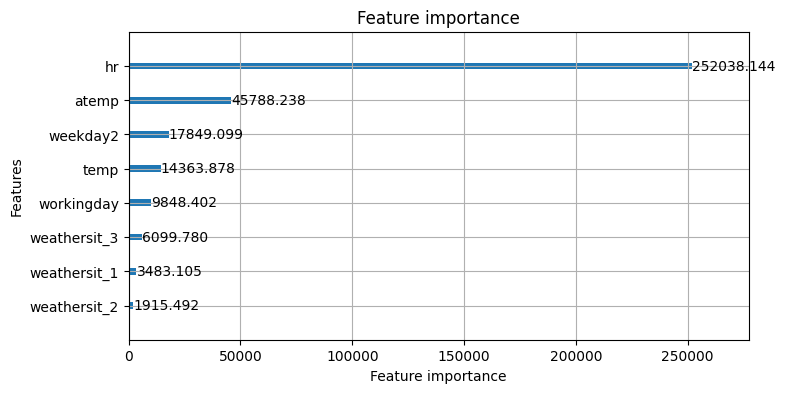

In [40]:
#特徴量重要度の可視化
lgb.plot_importance(model, figsize=(8,4), max_num_features=10, importance_type='gain')


### パラメータ探索   
・実行に掛かる時間、およびPCスペックの都合より、部分探索を実行  
・同じ訓練データやモデルにおいて、num_leavesの範囲を変更し、複数のモデルを作成

In [45]:
def objective(trial):
    param = {
        'objective': 'regression_l1',
        "metric": "mae",
        "max_depth":-1,
        'num_leaves': trial.suggest_int('num_leaves', 2500, 3500),
        "feature_fraction": trial.suggest_loguniform('feature_fraction', 0.4, 0.95),
        'subsample_freq': 1,
        "bagging_fraction":trial.suggest_loguniform('bagging_fraction', 0.8, 0.98),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 2, 20),
        'learning_rate': 0.01,
        "boosting": "gbdt",
        "lambda_l1":trial.suggest_loguniform("lambda_l1", 0.1, 0.8),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1, 15),
        "verbosity": -1,
        "random_state": 42
    }

    
    trains = lgb.Dataset(train_X, train_y)
    valids = lgb.Dataset(test_X, test_y,reference=trains)

    model = lgb.train(
    param,
    trains,
    valid_sets=[trains, valids],
    num_boost_round=3000,
    early_stopping_rounds=20,
    verbose_eval =100,
   )

    eval_pred = model.predict(test_X, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(test_y, eval_pred))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=3)

# 訓練データ予測のRMSE計算

print('RMSE : {:.3f}'.format(rmse))


[I 2022-12-02 14:03:39,202] A new study created in memory with name: no-name-c73f9e8d-858b-4e99-a691-efa812139032
[I 2022-12-02 14:03:39,208] A new study created in memory with name: no-name-ea1513e5-47ad-46ce-a470-ff199b0f88ba
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 77.8089	valid_1's l1: 67.5089
[200]	valid_0's l1: 53.1429	valid_1's l1: 49.6251
[300]	valid_0's l1: 38.8927	valid_1's l1: 42.0635
[400]	valid_0's l1: 33.0474	valid_1's l1: 40.0705
[500]	valid_0's l1: 29.4081	valid_1's l1: 39.216
[600]	valid_0's l1: 26.8479	valid_1's l1: 38.6659
[700]	valid_0's l1: 25.2616	valid_1's l1: 38.3288
Early stopping, best iteration is:
[694]	valid_0's l1: 25.3205	valid_1's l1: 38.3012


feature_fraction, val_score: 38.301195:  14%|#4        | 1/7 [00:03<00:18,  3.02s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


feature_fraction, val_score: 37.813005:  29%|##8       | 2/7 [00:05<00:14,  2.94s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.8025	valid_1's l1: 65.3203
[200]	valid_0's l1: 42.3549	valid_1's l1: 51.6632
[300]	valid_0's l1: 30.0339	valid_1's l1: 43.3103
[400]	valid_0's l1: 25.3406	valid_1's l1: 40.4902
[500]	valid_0's l1: 23.5398	valid_1's l1: 39.55
[600]	valid_0's l1: 22.6218	valid_1's l1: 39.2498
Early stopping, best iteration is:
[646]	valid_0's l1: 22.3042	valid_1's l1: 39.1468


feature_fraction, val_score: 37.813005:  43%|####2     | 3/7 [00:09<00:13,  3.36s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.0421	valid_1's l1: 66.1609
[200]	valid_0's l1: 47.9911	valid_1's l1: 48.5586
[300]	valid_0's l1: 36.7211	valid_1's l1: 42.7178
[400]	valid_0's l1: 30.4812	valid_1's l1: 40.1931
[500]	valid_0's l1: 27.3242	valid_1's l1: 39.3376
[600]	valid_0's l1: 25.1504	valid_1's l1: 38.8049
[700]	valid_0's l1: 24.0369	valid_1's l1: 38.6618
Early stopping, best iteration is:
[692]	valid_0's l1: 24.1208	valid_1's l1: 38.6439


feature_fraction, val_score: 37.813005:  57%|#####7    | 4/7 [00:14<00:11,  3.74s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.0421	valid_1's l1: 66.1609
[200]	valid_0's l1: 47.9911	valid_1's l1: 48.5586
[300]	valid_0's l1: 36.7211	valid_1's l1: 42.7178
[400]	valid_0's l1: 30.4812	valid_1's l1: 40.1931
[500]	valid_0's l1: 27.3242	valid_1's l1: 39.3376
[600]	valid_0's l1: 25.1504	valid_1's l1: 38.8049
[700]	valid_0's l1: 24.0369	valid_1's l1: 38.6618
Early stopping, best iteration is:
[692]	valid_0's l1: 24.1208	valid_1's l1: 38.6439


feature_fraction, val_score: 37.813005:  71%|#######1  | 5/7 [00:18<00:07,  3.93s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 89.464	valid_1's l1: 73.2962
[200]	valid_0's l1: 73.371	valid_1's l1: 60.2041
[300]	valid_0's l1: 61.1932	valid_1's l1: 52.457
[400]	valid_0's l1: 53.0069	valid_1's l1: 48.1856
[500]	valid_0's l1: 47.0018	valid_1's l1: 45.6072
[600]	valid_0's l1: 42.2268	valid_1's l1: 43.7051
[700]	valid_0's l1: 39.5997	valid_1's l1: 42.4718
[800]	valid_0's l1: 36.4135	valid_1's l1: 41.0738
[900]	valid_0's l1: 33.71	valid_1's l1: 39.8367
[1000]	valid_0's l1: 31.973	valid_1's l1: 39.1422
[1100]	valid_0's l1: 30.6797	valid_1's l1: 38.595
Early stopping, best iteration is:
[1133]	valid_0's l1: 30.0448	valid_1's l1: 38.3911


feature_fraction, val_score: 37.813005:  86%|########5 | 6/7 [00:22<00:03,  3.97s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.7606	valid_1's l1: 66.0077
[200]	valid_0's l1: 45.2466	valid_1's l1: 49.8949
[300]	valid_0's l1: 31.95	valid_1's l1: 41.893
[400]	valid_0's l1: 26.729	valid_1's l1: 39.7965
[500]	valid_0's l1: 24.5132	valid_1's l1: 39.1323
Early stopping, best iteration is:
[569]	valid_0's l1: 23.5616	valid_1's l1: 38.9955


num_leaves, val_score: 37.813005:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.6103	valid_1's l1: 39.3283
[500]	valid_0's l1: 27.6637	valid_1's l1: 38.2436
[600]	valid_0's l1: 25.9507	valid_1's l1: 37.8673
Early stopping, best iteration is:
[672]	valid_0's l1: 25.1611	valid_1's l1: 37.7401


num_leaves, val_score: 37.740121:   5%|5         | 1/20 [00:02<00:51,  2.70s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.899	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.9455	valid_1's l1: 41.8401
[400]	valid_0's l1: 30.7235	valid_1's l1: 39.2024
[500]	valid_0's l1: 27.7775	valid_1's l1: 38.2389
[600]	valid_0's l1: 26.1366	valid_1's l1: 37.9791
Early stopping, best iteration is:
[662]	valid_0's l1: 25.3833	valid_1's l1: 37.8277


num_leaves, val_score: 37.740121:  10%|#         | 2/20 [00:04<00:39,  2.17s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  15%|#5        | 3/20 [00:06<00:34,  2.03s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  20%|##        | 4/20 [00:08<00:31,  1.99s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  25%|##5       | 5/20 [00:10<00:28,  1.92s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  30%|###       | 6/20 [00:12<00:26,  1.92s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  35%|###5      | 7/20 [00:14<00:25,  1.95s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  40%|####      | 8/20 [00:15<00:23,  1.94s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 77.9648	valid_1's l1: 69.9758
[200]	valid_0's l1: 63.2458	valid_1's l1: 60.397
[300]	valid_0's l1: 57.4948	valid_1's l1: 57.8162
[400]	valid_0's l1: 53.3008	valid_1's l1: 56.3828


num_leaves, val_score: 37.740121:  45%|####5     | 9/20 [00:16<00:16,  1.51s/it]

Early stopping, best iteration is:
[469]	valid_0's l1: 51.0008	valid_1's l1: 55.4158
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.5465	valid_1's l1: 39.2295
[500]	valid_0's l1: 27.6023	valid_1's l1: 38.2385
[600]	valid_0's l1: 25.9455	valid_1's l1: 37.9344
Early stopping, best iteration is:
[665]	valid_0's l1: 25.2016	valid_1's l1: 37.813


num_leaves, val_score: 37.740121:  50%|#####     | 10/20 [00:19<00:20,  2.06s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.907	valid_1's l1: 49.1225
[300]	valid_0's l1: 37.2848	valid_1's l1: 42.0348
[400]	valid_0's l1: 31.089	valid_1's l1: 39.2286
[500]	valid_0's l1: 27.9399	valid_1's l1: 38.1743
[600]	valid_0's l1: 26.1684	valid_1's l1: 37.7719
[700]	valid_0's l1: 25.1985	valid_1's l1: 37.5798
Early stopping, best iteration is:
[708]	valid_0's l1: 25.1448	valid_1's l1: 37.5712


num_leaves, val_score: 37.571152:  55%|#####5    | 11/20 [00:22<00:19,  2.11s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.9077	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.9228	valid_1's l1: 41.8779
[400]	valid_0's l1: 30.7793	valid_1's l1: 39.2295
[500]	valid_0's l1: 28.0122	valid_1's l1: 38.1607
[600]	valid_0's l1: 26.1729	valid_1's l1: 37.8212
[700]	valid_0's l1: 25.178	valid_1's l1: 37.5723
Early stopping, best iteration is:
[739]	valid_0's l1: 24.9225	valid_1's l1: 37.5559


num_leaves, val_score: 37.555864:  60%|######    | 12/20 [00:23<00:16,  2.06s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3169	valid_1's l1: 66.6024
[200]	valid_0's l1: 48.9811	valid_1's l1: 49.1626
[300]	valid_0's l1: 37.2897	valid_1's l1: 41.9519
[400]	valid_0's l1: 31.3139	valid_1's l1: 39.4132
[500]	valid_0's l1: 28.2324	valid_1's l1: 38.2764
[600]	valid_0's l1: 26.529	valid_1's l1: 37.8351
Early stopping, best iteration is:
[665]	valid_0's l1: 25.7319	valid_1's l1: 37.6312


num_leaves, val_score: 37.555864:  65%|######5   | 13/20 [00:25<00:13,  1.92s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3432	valid_1's l1: 66.5927
[200]	valid_0's l1: 49.0948	valid_1's l1: 49.1877
[300]	valid_0's l1: 38.0067	valid_1's l1: 42.3329
[400]	valid_0's l1: 32.2194	valid_1's l1: 39.5782
[500]	valid_0's l1: 28.6407	valid_1's l1: 38.228
[600]	valid_0's l1: 26.8936	valid_1's l1: 37.7549
[700]	valid_0's l1: 25.8493	valid_1's l1: 37.4392
Early stopping, best iteration is:
[742]	valid_0's l1: 25.5722	valid_1's l1: 37.3644


num_leaves, val_score: 37.364427:  70%|#######   | 14/20 [00:27<00:11,  1.86s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 74.3316	valid_1's l1: 66.8633
[200]	valid_0's l1: 51.8299	valid_1's l1: 50.6634
[300]	valid_0's l1: 40.531	valid_1's l1: 43.247
[400]	valid_0's l1: 35.4088	valid_1's l1: 40.6861
[500]	valid_0's l1: 32.0665	valid_1's l1: 39.2177
[600]	valid_0's l1: 29.9524	valid_1's l1: 38.2933
[700]	valid_0's l1: 28.7356	valid_1's l1: 37.991
[800]	valid_0's l1: 27.7728	valid_1's l1: 37.7916
Early stopping, best iteration is:
[867]	valid_0's l1: 27.208	valid_1's l1: 37.7184


num_leaves, val_score: 37.364427:  75%|#######5  | 15/20 [00:28<00:08,  1.68s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.483	valid_1's l1: 66.6436
[200]	valid_0's l1: 49.5468	valid_1's l1: 49.2625
[300]	valid_0's l1: 38.4849	valid_1's l1: 42.4969
[400]	valid_0's l1: 32.8621	valid_1's l1: 39.8159
[500]	valid_0's l1: 29.9014	valid_1's l1: 38.8128
[600]	valid_0's l1: 27.4961	valid_1's l1: 38.0893


num_leaves, val_score: 37.364427:  80%|########  | 16/20 [00:29<00:06,  1.55s/it]

Early stopping, best iteration is:
[663]	valid_0's l1: 26.7371	valid_1's l1: 37.714
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3432	valid_1's l1: 66.5927
[200]	valid_0's l1: 49.0948	valid_1's l1: 49.1877
[300]	valid_0's l1: 38.0067	valid_1's l1: 42.3329
[400]	valid_0's l1: 32.2194	valid_1's l1: 39.5782
[500]	valid_0's l1: 28.6407	valid_1's l1: 38.228
[600]	valid_0's l1: 26.8936	valid_1's l1: 37.7549
[700]	valid_0's l1: 25.8493	valid_1's l1: 37.4392
Early stopping, best iteration is:
[742]	valid_0's l1: 25.5722	valid_1's l1: 37.3644


num_leaves, val_score: 37.364427:  85%|########5 | 17/20 [00:31<00:05,  1.72s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.407	valid_1's l1: 66.6424
[200]	valid_0's l1: 49.7113	valid_1's l1: 49.4136
[300]	valid_0's l1: 38.1584	valid_1's l1: 42.2087
[400]	valid_0's l1: 32.434	valid_1's l1: 39.6587
[500]	valid_0's l1: 28.8485	valid_1's l1: 38.254
[600]	valid_0's l1: 26.9501	valid_1's l1: 37.7401
Early stopping, best iteration is:
[665]	valid_0's l1: 26.2642	valid_1's l1: 37.5725


num_leaves, val_score: 37.364427:  90%|######### | 18/20 [00:34<00:03,  1.87s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3165	valid_1's l1: 66.599
[200]	valid_0's l1: 48.8989	valid_1's l1: 49.1232
[300]	valid_0's l1: 36.8587	valid_1's l1: 41.8216
[400]	valid_0's l1: 30.535	valid_1's l1: 39.2165
[500]	valid_0's l1: 27.5797	valid_1's l1: 38.1159
[600]	valid_0's l1: 26.0004	valid_1's l1: 37.8149
Early stopping, best iteration is:
[663]	valid_0's l1: 25.2949	valid_1's l1: 37.6943


num_leaves, val_score: 37.364427:  95%|#########5| 19/20 [00:36<00:02,  2.07s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6737	valid_1's l1: 66.6318
[200]	valid_0's l1: 50.3378	valid_1's l1: 49.8438
[300]	valid_0's l1: 39.6592	valid_1's l1: 43.1789
[400]	valid_0's l1: 34.2566	valid_1's l1: 40.5465
[500]	valid_0's l1: 31.2142	valid_1's l1: 39.3521
[600]	valid_0's l1: 28.611	valid_1's l1: 38.2192
[700]	valid_0's l1: 27.1377	valid_1's l1: 37.7855


num_leaves, val_score: 37.364427: 100%|##########| 20/20 [00:38<00:00,  1.90s/it]


Early stopping, best iteration is:
[743]	valid_0's l1: 26.7306	valid_1's l1: 37.6902


bagging, val_score: 37.364427:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.3789	valid_1's l1: 66.4075
[200]	valid_0's l1: 50.057	valid_1's l1: 49.7256
[300]	valid_0's l1: 38.3503	valid_1's l1: 42.6527
[400]	valid_0's l1: 31.7678	valid_1's l1: 39.5056
[500]	valid_0's l1: 28.6967	valid_1's l1: 38.5393


bagging, val_score: 37.364427:  10%|#         | 1/10 [00:01<00:09,  1.10s/it]

Early stopping, best iteration is:
[552]	valid_0's l1: 27.8929	valid_1's l1: 38.1925
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7231	valid_1's l1: 66.6369
[200]	valid_0's l1: 50.0743	valid_1's l1: 49.7117
[300]	valid_0's l1: 38.4294	valid_1's l1: 42.5606
[400]	valid_0's l1: 32.2818	valid_1's l1: 39.705
[500]	valid_0's l1: 29.2785	valid_1's l1: 38.4012
[600]	valid_0's l1: 27.2676	valid_1's l1: 37.8436
Early stopping, best iteration is:
[636]	valid_0's l1: 26.677	valid_1's l1: 37.673


bagging, val_score: 37.364427:  20%|##        | 2/10 [00:02<00:12,  1.52s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6753	valid_1's l1: 66.1346
[200]	valid_0's l1: 52.4246	valid_1's l1: 50.9374
[300]	valid_0's l1: 40.3219	valid_1's l1: 43.4445
[400]	valid_0's l1: 33.9802	valid_1's l1: 40.3532
[500]	valid_0's l1: 30.4639	valid_1's l1: 38.6484
[600]	valid_0's l1: 28.2795	valid_1's l1: 37.5515
[700]	valid_0's l1: 27.2183	valid_1's l1: 37.1347
Early stopping, best iteration is:
[696]	valid_0's l1: 27.246	valid_1's l1: 37.092


bagging, val_score: 37.091980:  30%|###       | 3/10 [00:04<00:10,  1.47s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6557	valid_1's l1: 66.592
[200]	valid_0's l1: 49.4233	valid_1's l1: 49.131
[300]	valid_0's l1: 38.2108	valid_1's l1: 42.4867
[400]	valid_0's l1: 32.7536	valid_1's l1: 39.9709
[500]	valid_0's l1: 29.6442	valid_1's l1: 38.8606
[600]	valid_0's l1: 27.297	valid_1's l1: 38.0744
[700]	valid_0's l1: 26.1138	valid_1's l1: 37.7987
Early stopping, best iteration is:
[747]	valid_0's l1: 25.7639	valid_1's l1: 37.6984


bagging, val_score: 37.091980:  40%|####      | 4/10 [00:05<00:09,  1.50s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6895	valid_1's l1: 66.5702
[200]	valid_0's l1: 50.4869	valid_1's l1: 49.8974
[300]	valid_0's l1: 38.1212	valid_1's l1: 41.9991
[400]	valid_0's l1: 31.4591	valid_1's l1: 38.9972
[500]	valid_0's l1: 28.6556	valid_1's l1: 37.7987
[600]	valid_0's l1: 26.8065	valid_1's l1: 37.2352
[700]	valid_0's l1: 25.8721	valid_1's l1: 36.9594
[800]	valid_0's l1: 25.2244	valid_1's l1: 36.8217
Early stopping, best iteration is:
[796]	valid_0's l1: 25.2556	valid_1's l1: 36.8045


bagging, val_score: 36.804472:  50%|#####     | 5/10 [00:08<00:08,  1.75s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.8756	valid_1's l1: 67.1781
[200]	valid_0's l1: 49.944	valid_1's l1: 49.7849
[300]	valid_0's l1: 38.7265	valid_1's l1: 42.5898
[400]	valid_0's l1: 32.227	valid_1's l1: 39.5945
[500]	valid_0's l1: 28.9569	valid_1's l1: 38.4743
[600]	valid_0's l1: 27.1635	valid_1's l1: 37.9812
[700]	valid_0's l1: 26.1666	valid_1's l1: 37.5932
Early stopping, best iteration is:
[681]	valid_0's l1: 26.3108	valid_1's l1: 37.5668


bagging, val_score: 36.804472:  60%|######    | 6/10 [00:09<00:06,  1.62s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6331	valid_1's l1: 66.7088
[200]	valid_0's l1: 49.5071	valid_1's l1: 49.2591
[300]	valid_0's l1: 37.625	valid_1's l1: 41.7427
[400]	valid_0's l1: 31.5282	valid_1's l1: 39.1352
[500]	valid_0's l1: 28.4384	valid_1's l1: 37.8926
[600]	valid_0's l1: 26.8139	valid_1's l1: 37.5311
[700]	valid_0's l1: 25.7861	valid_1's l1: 37.1942
Early stopping, best iteration is:
[741]	valid_0's l1: 25.5186	valid_1's l1: 37.0699


bagging, val_score: 36.804472:  70%|#######   | 7/10 [00:11<00:05,  1.90s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7622	valid_1's l1: 66.774
[200]	valid_0's l1: 49.7181	valid_1's l1: 49.436
[300]	valid_0's l1: 38.1654	valid_1's l1: 42.0817
[400]	valid_0's l1: 31.9556	valid_1's l1: 39.3928
[500]	valid_0's l1: 29.1577	valid_1's l1: 38.1632
[600]	valid_0's l1: 27.1708	valid_1's l1: 37.3826
[700]	valid_0's l1: 26.098	valid_1's l1: 36.9945
[800]	valid_0's l1: 25.4312	valid_1's l1: 36.841
Early stopping, best iteration is:
[818]	valid_0's l1: 25.3207	valid_1's l1: 36.7691


bagging, val_score: 36.769070:  80%|########  | 8/10 [00:14<00:04,  2.12s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.4411	valid_1's l1: 66.2527
[200]	valid_0's l1: 52.0998	valid_1's l1: 50.3616
[300]	valid_0's l1: 39.8609	valid_1's l1: 42.906
[400]	valid_0's l1: 33.1926	valid_1's l1: 39.6358
[500]	valid_0's l1: 30.0657	valid_1's l1: 38.4231
[600]	valid_0's l1: 28.0164	valid_1's l1: 37.6274
[700]	valid_0's l1: 26.9217	valid_1's l1: 37.1232
Early stopping, best iteration is:
[712]	valid_0's l1: 26.8366	valid_1's l1: 37.062


bagging, val_score: 36.769070:  90%|######### | 9/10 [00:15<00:01,  1.86s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.2803	valid_1's l1: 65.8105
[200]	valid_0's l1: 51.3733	valid_1's l1: 50.5882
[300]	valid_0's l1: 40.3957	valid_1's l1: 43.5721
[400]	valid_0's l1: 33.212	valid_1's l1: 39.7088
[500]	valid_0's l1: 29.9461	valid_1's l1: 38.2917
[600]	valid_0's l1: 28.2828	valid_1's l1: 37.9013
[700]	valid_0's l1: 27.2212	valid_1's l1: 37.4787
[800]	valid_0's l1: 26.4735	valid_1's l1: 37.1197
Early stopping, best iteration is:
[834]	valid_0's l1: 26.2515	valid_1's l1: 37.0116


feature_fraction_stage2, val_score: 36.769070:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7622	valid_1's l1: 66.774
[200]	valid_0's l1: 49.7181	valid_1's l1: 49.436
[300]	valid_0's l1: 38.1654	valid_1's l1: 42.0817
[400]	valid_0's l1: 31.9556	valid_1's l1: 39.3928
[500]	valid_0's l1: 29.1577	valid_1's l1: 38.1632
[600]	valid_0's l1: 27.1708	valid_1's l1: 37.3826
[700]	valid_0's l1: 26.098	valid_1's l1: 36.9945
[800]	valid_0's l1: 25.4312	valid_1's l1: 36.841
Early stopping, best iteration is:
[818]	valid_0's l1: 25.3207	valid_1's l1: 36.7691


feature_fraction_stage2, val_score: 36.769070:  17%|#6        | 1/6 [00:01<00:08,  1.65s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 78.4724	valid_1's l1: 67.9758
[200]	valid_0's l1: 54.7975	valid_1's l1: 50.3407
[300]	valid_0's l1: 40.1983	valid_1's l1: 41.9687
[400]	valid_0's l1: 33.7419	valid_1's l1: 39.4836
[500]	valid_0's l1: 30.0269	valid_1's l1: 38.4378
[600]	valid_0's l1: 27.7372	valid_1's l1: 37.8753
Early stopping, best iteration is:
[673]	valid_0's l1: 26.7178	valid_1's l1: 37.6948


feature_fraction_stage2, val_score: 36.769070:  33%|###3      | 2/6 [00:03<00:06,  1.64s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7622	valid_1's l1: 66.774
[200]	valid_0's l1: 49.7181	valid_1's l1: 49.436
[300]	valid_0's l1: 38.1654	valid_1's l1: 42.0817
[400]	valid_0's l1: 31.9556	valid_1's l1: 39.3928
[500]	valid_0's l1: 29.1577	valid_1's l1: 38.1632
[600]	valid_0's l1: 27.1708	valid_1's l1: 37.3826
[700]	valid_0's l1: 26.098	valid_1's l1: 36.9945
[800]	valid_0's l1: 25.4312	valid_1's l1: 36.841
Early stopping, best iteration is:
[818]	valid_0's l1: 25.3207	valid_1's l1: 36.7691


feature_fraction_stage2, val_score: 36.769070:  50%|#####     | 3/6 [00:05<00:05,  1.76s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 89.6233	valid_1's l1: 73.6115
[200]	valid_0's l1: 73.3911	valid_1's l1: 59.9895
[300]	valid_0's l1: 61.2977	valid_1's l1: 52.026
[400]	valid_0's l1: 53.8732	valid_1's l1: 48.3994
[500]	valid_0's l1: 48.1847	valid_1's l1: 46.0487
[600]	valid_0's l1: 42.7824	valid_1's l1: 43.5103
[700]	valid_0's l1: 39.85	valid_1's l1: 42.0998
[800]	valid_0's l1: 36.5138	valid_1's l1: 40.5596
Early stopping, best iteration is:
[820]	valid_0's l1: 35.9139	valid_1's l1: 40.3693


feature_fraction_stage2, val_score: 36.769070:  67%|######6   | 4/6 [00:06<00:03,  1.60s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7622	valid_1's l1: 66.774
[200]	valid_0's l1: 49.7181	valid_1's l1: 49.436
[300]	valid_0's l1: 38.1654	valid_1's l1: 42.0817
[400]	valid_0's l1: 31.9556	valid_1's l1: 39.3928
[500]	valid_0's l1: 29.1577	valid_1's l1: 38.1632
[600]	valid_0's l1: 27.1708	valid_1's l1: 37.3826
[700]	valid_0's l1: 26.098	valid_1's l1: 36.9945
[800]	valid_0's l1: 25.4312	valid_1's l1: 36.841
Early stopping, best iteration is:
[818]	valid_0's l1: 25.3207	valid_1's l1: 36.7691


feature_fraction_stage2, val_score: 36.769070:  83%|########3 | 5/6 [00:09<00:01,  1.94s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7622	valid_1's l1: 66.774
[200]	valid_0's l1: 49.7181	valid_1's l1: 49.436
[300]	valid_0's l1: 38.1654	valid_1's l1: 42.0817
[400]	valid_0's l1: 31.9556	valid_1's l1: 39.3928
[500]	valid_0's l1: 29.1577	valid_1's l1: 38.1632
[600]	valid_0's l1: 27.1708	valid_1's l1: 37.3826
[700]	valid_0's l1: 26.098	valid_1's l1: 36.9945
[800]	valid_0's l1: 25.4312	valid_1's l1: 36.841
Early stopping, best iteration is:
[818]	valid_0's l1: 25.3207	valid_1's l1: 36.7691


regularization_factors, val_score: 36.769070:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.6708	valid_1's l1: 60.5613
[200]	valid_0's l1: 43.5888	valid_1's l1: 44.3554
[300]	valid_0's l1: 33.708	valid_1's l1: 38.7651
[400]	valid_0's l1: 28.8368	valid_1's l1: 37.3647
[500]	valid_0's l1: 26.83	valid_1's l1: 36.8889


regularization_factors, val_score: 36.558595:   5%|5         | 1/20 [00:01<00:27,  1.44s/it]

Early stopping, best iteration is:
[561]	valid_0's l1: 26.0832	valid_1's l1: 36.5586
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6072	valid_1's l1: 58.9785
[200]	valid_0's l1: 41.6324	valid_1's l1: 43.2063
[300]	valid_0's l1: 32.2262	valid_1's l1: 38.2338
[400]	valid_0's l1: 28.0353	valid_1's l1: 37.0693
[500]	valid_0's l1: 26.3465	valid_1's l1: 36.5834


regularization_factors, val_score: 36.251410:  10%|#         | 2/20 [00:03<00:28,  1.59s/it]

Early stopping, best iteration is:
[577]	valid_0's l1: 25.6033	valid_1's l1: 36.2514
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6005	valid_1's l1: 58.9891
[200]	valid_0's l1: 41.533	valid_1's l1: 43.1277
[300]	valid_0's l1: 32.2159	valid_1's l1: 38.0887
[400]	valid_0's l1: 27.9761	valid_1's l1: 36.9277
[500]	valid_0's l1: 26.3283	valid_1's l1: 36.5815


regularization_factors, val_score: 36.251410:  15%|#5        | 3/20 [00:04<00:26,  1.56s/it]

Early stopping, best iteration is:
[577]	valid_0's l1: 25.5908	valid_1's l1: 36.303
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6005	valid_1's l1: 58.9891
[200]	valid_0's l1: 41.533	valid_1's l1: 43.1277
[300]	valid_0's l1: 32.2159	valid_1's l1: 38.0887
[400]	valid_0's l1: 27.9761	valid_1's l1: 36.9277
[500]	valid_0's l1: 26.3283	valid_1's l1: 36.5815
Early stopping, best iteration is:
[577]	valid_0's l1: 25.5908	valid_1's l1: 36.303


regularization_factors, val_score: 36.251410:  20%|##        | 4/20 [00:06<00:24,  1.52s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.8014	valid_1's l1: 61.4435
[200]	valid_0's l1: 44.3098	valid_1's l1: 44.9132
[300]	valid_0's l1: 33.8221	valid_1's l1: 38.8209
[400]	valid_0's l1: 28.8411	valid_1's l1: 37.4345
[500]	valid_0's l1: 26.7974	valid_1's l1: 37.0328
[600]	valid_0's l1: 25.6782	valid_1's l1: 36.6358
Early stopping, best iteration is:
[612]	valid_0's l1: 25.5747	valid_1's l1: 36.586


regularization_factors, val_score: 36.251410:  25%|##5       | 5/20 [00:07<00:22,  1.50s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6249	valid_1's l1: 59.0703
[200]	valid_0's l1: 41.8394	valid_1's l1: 43.3668
[300]	valid_0's l1: 32.4384	valid_1's l1: 38.2887
[400]	valid_0's l1: 28.137	valid_1's l1: 37.1474
[500]	valid_0's l1: 26.4663	valid_1's l1: 36.7973
Early stopping, best iteration is:
[576]	valid_0's l1: 25.6857	valid_1's l1: 36.4485


regularization_factors, val_score: 36.251410:  30%|###       | 6/20 [00:09<00:22,  1.63s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6247	valid_1's l1: 59.0703
[200]	valid_0's l1: 41.8492	valid_1's l1: 43.3706
[300]	valid_0's l1: 32.4632	valid_1's l1: 38.2572
[400]	valid_0's l1: 28.117	valid_1's l1: 37.1575
[500]	valid_0's l1: 26.3998	valid_1's l1: 36.781


regularization_factors, val_score: 36.251410:  35%|###5      | 7/20 [00:11<00:21,  1.68s/it]

[600]	valid_0's l1: 25.4679	valid_1's l1: 36.5187
Early stopping, best iteration is:
[581]	valid_0's l1: 25.6067	valid_1's l1: 36.502
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.3655	valid_1's l1: 60.4087
[200]	valid_0's l1: 43.2358	valid_1's l1: 44.1478
[300]	valid_0's l1: 33.2437	valid_1's l1: 38.6632
[400]	valid_0's l1: 28.5551	valid_1's l1: 37.2572
[500]	valid_0's l1: 26.6541	valid_1's l1: 36.8575
Early stopping, best iteration is:
[576]	valid_0's l1: 25.8201	valid_1's l1: 36.514


regularization_factors, val_score: 36.251410:  40%|####      | 8/20 [00:13<00:22,  1.85s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.3836	valid_1's l1: 62.0753
[200]	valid_0's l1: 45.0896	valid_1's l1: 45.3914
[300]	valid_0's l1: 34.2755	valid_1's l1: 39.175
[400]	valid_0's l1: 29.0542	valid_1's l1: 37.5859
[500]	valid_0's l1: 26.917	valid_1's l1: 37.0698


regularization_factors, val_score: 36.251410:  45%|####5     | 9/20 [00:15<00:22,  2.06s/it]

Early stopping, best iteration is:
[577]	valid_0's l1: 25.9614	valid_1's l1: 36.7946
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.6104	valid_1's l1: 62.2271
[200]	valid_0's l1: 46.0362	valid_1's l1: 45.9184
[300]	valid_0's l1: 35.1028	valid_1's l1: 39.5889
[400]	valid_0's l1: 29.6832	valid_1's l1: 37.9546
[500]	valid_0's l1: 27.4762	valid_1's l1: 37.3192
[600]	valid_0's l1: 26.2111	valid_1's l1: 36.7338
Early stopping, best iteration is:
[612]	valid_0's l1: 26.0962	valid_1's l1: 36.6654


regularization_factors, val_score: 36.251410:  50%|#####     | 10/20 [00:17<00:19,  1.91s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.9089	valid_1's l1: 59.2617
[200]	valid_0's l1: 41.8481	valid_1's l1: 43.3894
[300]	valid_0's l1: 32.405	valid_1's l1: 38.3183
[400]	valid_0's l1: 28.0943	valid_1's l1: 37.0225
[500]	valid_0's l1: 26.3856	valid_1's l1: 36.7125
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6199	valid_1's l1: 36.3656


regularization_factors, val_score: 36.251410:  55%|#####5    | 11/20 [00:18<00:15,  1.72s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6008	valid_1's l1: 58.9896
[200]	valid_0's l1: 41.5319	valid_1's l1: 43.1228
[300]	valid_0's l1: 32.1583	valid_1's l1: 38.0563
[400]	valid_0's l1: 27.9587	valid_1's l1: 36.921
[500]	valid_0's l1: 26.3256	valid_1's l1: 36.5632


regularization_factors, val_score: 36.251410:  60%|######    | 12/20 [00:20<00:13,  1.68s/it]

Early stopping, best iteration is:
[577]	valid_0's l1: 25.5817	valid_1's l1: 36.2656
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 75.4629	valid_1's l1: 67.3912
[200]	valid_0's l1: 55.964	valid_1's l1: 54.0353
[300]	valid_0's l1: 43.5014	valid_1's l1: 45.8675
[400]	valid_0's l1: 37.7271	valid_1's l1: 42.8273
[500]	valid_0's l1: 34.1861	valid_1's l1: 40.7413
[600]	valid_0's l1: 31.5356	valid_1's l1: 39.0895
[700]	valid_0's l1: 30.1058	valid_1's l1: 38.2721
[800]	valid_0's l1: 29.156	valid_1's l1: 37.8718
[900]	valid_0's l1: 28.2943	valid_1's l1: 37.4095
Early stopping, best iteration is:
[971]	valid_0's l1: 27.6753	valid_1's l1: 37.2163


regularization_factors, val_score: 36.251410:  65%|######5   | 13/20 [00:22<00:11,  1.64s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6008	valid_1's l1: 58.9896
[200]	valid_0's l1: 41.532	valid_1's l1: 43.1231
[300]	valid_0's l1: 32.197	valid_1's l1: 38.1055
[400]	valid_0's l1: 27.9687	valid_1's l1: 36.9665
[500]	valid_0's l1: 26.3132	valid_1's l1: 36.6085
Early stopping, best iteration is:
[577]	valid_0's l1: 25.5745	valid_1's l1: 36.379


regularization_factors, val_score: 36.251410:  70%|#######   | 14/20 [00:23<00:09,  1.61s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6938	valid_1's l1: 59.056
[200]	valid_0's l1: 41.821	valid_1's l1: 43.3237
[300]	valid_0's l1: 32.3447	valid_1's l1: 38.092
[400]	valid_0's l1: 28.0721	valid_1's l1: 36.9068
[500]	valid_0's l1: 26.3807	valid_1's l1: 36.4426
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6276	valid_1's l1: 36.0486


regularization_factors, val_score: 36.048572:  75%|#######5  | 15/20 [00:24<00:07,  1.52s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6889	valid_1's l1: 59.0191
[200]	valid_0's l1: 41.6507	valid_1's l1: 43.2149
[300]	valid_0's l1: 32.2739	valid_1's l1: 38.216
[400]	valid_0's l1: 27.9831	valid_1's l1: 37.0529
[500]	valid_0's l1: 26.3257	valid_1's l1: 36.6335


regularization_factors, val_score: 36.048572:  80%|########  | 16/20 [00:26<00:05,  1.42s/it]

Early stopping, best iteration is:
[516]	valid_0's l1: 26.136	valid_1's l1: 36.5358
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.4306	valid_1's l1: 66.3641
[200]	valid_0's l1: 49.6356	valid_1's l1: 49.4249
[300]	valid_0's l1: 37.8824	valid_1's l1: 41.8933
[400]	valid_0's l1: 31.2601	valid_1's l1: 38.9398
[500]	valid_0's l1: 28.449	valid_1's l1: 37.9771
[600]	valid_0's l1: 26.7385	valid_1's l1: 37.3188
[700]	valid_0's l1: 25.8076	valid_1's l1: 36.9773
Early stopping, best iteration is:
[742]	valid_0's l1: 25.5311	valid_1's l1: 36.8808


regularization_factors, val_score: 36.048572:  85%|########5 | 17/20 [00:27<00:04,  1.45s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5444	valid_1's l1: 60.4123
[200]	valid_0's l1: 43.4099	valid_1's l1: 44.116
[300]	valid_0's l1: 33.4986	valid_1's l1: 38.7835
[400]	valid_0's l1: 28.6147	valid_1's l1: 37.3532
[500]	valid_0's l1: 26.704	valid_1's l1: 36.9367
[600]	valid_0's l1: 25.6481	valid_1's l1: 36.5452
Early stopping, best iteration is:
[612]	valid_0's l1: 25.5552	valid_1's l1: 36.5216


regularization_factors, val_score: 36.048572:  90%|######### | 18/20 [00:28<00:02,  1.44s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.5827	valid_1's l1: 58.9541
[200]	valid_0's l1: 41.5435	valid_1's l1: 43.1322
[300]	valid_0's l1: 32.2068	valid_1's l1: 38.13
[400]	valid_0's l1: 27.966	valid_1's l1: 36.966
[500]	valid_0's l1: 26.331	valid_1's l1: 36.5931


regularization_factors, val_score: 36.048572:  95%|#########5| 19/20 [00:30<00:01,  1.61s/it]

Early stopping, best iteration is:
[576]	valid_0's l1: 25.5956	valid_1's l1: 36.3024
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6714	valid_1's l1: 58.9982
[200]	valid_0's l1: 41.6993	valid_1's l1: 43.2556
[300]	valid_0's l1: 32.2984	valid_1's l1: 38.1933
[400]	valid_0's l1: 28.043	valid_1's l1: 37.01
Early stopping, best iteration is:
[454]	valid_0's l1: 26.9446	valid_1's l1: 36.7428


min_data_in_leaf, val_score: 36.048572:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6938	valid_1's l1: 59.056
[200]	valid_0's l1: 41.821	valid_1's l1: 43.3237
[300]	valid_0's l1: 32.3447	valid_1's l1: 38.092
[400]	valid_0's l1: 28.0721	valid_1's l1: 36.9068
[500]	valid_0's l1: 26.3807	valid_1's l1: 36.4426
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6276	valid_1's l1: 36.0486


min_data_in_leaf, val_score: 36.048572:  20%|##        | 1/5 [00:01<00:06,  1.67s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6938	valid_1's l1: 59.056
[200]	valid_0's l1: 41.821	valid_1's l1: 43.3237
[300]	valid_0's l1: 32.3447	valid_1's l1: 38.092
[400]	valid_0's l1: 28.0721	valid_1's l1: 36.9068
[500]	valid_0's l1: 26.3807	valid_1's l1: 36.4426
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6276	valid_1's l1: 36.0486


min_data_in_leaf, val_score: 36.048572:  40%|####      | 2/5 [00:03<00:05,  1.81s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6938	valid_1's l1: 59.056
[200]	valid_0's l1: 41.821	valid_1's l1: 43.3237
[300]	valid_0's l1: 32.3447	valid_1's l1: 38.092
[400]	valid_0's l1: 28.0721	valid_1's l1: 36.9068
[500]	valid_0's l1: 26.3807	valid_1's l1: 36.4426
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6276	valid_1's l1: 36.0486


min_data_in_leaf, val_score: 36.048572:  60%|######    | 3/5 [00:05<00:03,  1.65s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6938	valid_1's l1: 59.056
[200]	valid_0's l1: 41.821	valid_1's l1: 43.3237
[300]	valid_0's l1: 32.3447	valid_1's l1: 38.092
[400]	valid_0's l1: 28.0721	valid_1's l1: 36.9068
[500]	valid_0's l1: 26.3807	valid_1's l1: 36.4426
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6276	valid_1's l1: 36.0486


min_data_in_leaf, val_score: 36.048572:  80%|########  | 4/5 [00:06<00:01,  1.57s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 64.6938	valid_1's l1: 59.056
[200]	valid_0's l1: 41.821	valid_1's l1: 43.3237
[300]	valid_0's l1: 32.3447	valid_1's l1: 38.092
[400]	valid_0's l1: 28.0721	valid_1's l1: 36.9068
[500]	valid_0's l1: 26.3807	valid_1's l1: 36.4426
Early stopping, best iteration is:
[577]	valid_0's l1: 25.6276	valid_1's l1: 36.0486


min_data_in_leaf, val_score: 36.048572: 100%|##########| 5/5 [00:08<00:00,  1.64s/it]
[I 2022-12-02 14:05:53,018] Trial 0 finished with value: 58.479701070828625 and parameters: {'num_leaves': 3394, 'feature_fraction': 0.5586069342743915, 'bagging_fraction': 0.9429590943252636, 'min_data_in_leaf': 17, 'lambda_l1': 0.21487324082301312, 'lambda_l2': 8.480695275793423}. Best is trial 0 with value: 58.479701070828625.
[I 2022-12-02 14:05:53,023] A new study created in memory with name: no-name-d4625c77-8215-4106-92f8-f2575528f1c3
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.1939	valid_1's l1: 64.8323
[200]	valid_0's l1: 42.2116	valid_1's l1: 48.3731
[300]	valid_0's l1: 30.8744	valid_1's l1: 43.2623
[400]	valid_0's l1: 25.4121	valid_1's l1: 41.9155
[500]	valid_0's l1: 22.892	valid_1's l1: 41.7349
Early stopping, best iteration is:
[480]	valid_0's l1: 23.2902	valid_1's l1: 41.7193


feature_fraction, val_score: 41.719303:  14%|#4        | 1/7 [00:06<00:40,  6.72s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 62.1008	valid_1's l1: 63.1992
[200]	valid_0's l1: 36.7596	valid_1's l1: 47.6243
[300]	valid_0's l1: 26.3645	valid_1's l1: 42.91
Early stopping, best iteration is:
[363]	valid_0's l1: 23.3607	valid_1's l1: 42.2746


feature_fraction, val_score: 41.719303:  29%|##8       | 2/7 [00:12<00:29,  5.89s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 56.611	valid_1's l1: 61.4202
[200]	valid_0's l1: 33.3998	valid_1's l1: 48.6948
[300]	valid_0's l1: 23.9421	valid_1's l1: 44.1999
[400]	valid_0's l1: 20.429	valid_1's l1: 42.7663
Early stopping, best iteration is:
[470]	valid_0's l1: 19.5125	valid_1's l1: 42.4495


feature_fraction, val_score: 41.719303:  43%|####2     | 3/7 [00:20<00:27,  6.91s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.1939	valid_1's l1: 64.8323
[200]	valid_0's l1: 42.2116	valid_1's l1: 48.3731
[300]	valid_0's l1: 30.8744	valid_1's l1: 43.2623
[400]	valid_0's l1: 25.4121	valid_1's l1: 41.9155
[500]	valid_0's l1: 22.892	valid_1's l1: 41.7349
Early stopping, best iteration is:
[480]	valid_0's l1: 23.2902	valid_1's l1: 41.7193


feature_fraction, val_score: 41.719303:  57%|#####7    | 4/7 [00:26<00:19,  6.62s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 87.5567	valid_1's l1: 74.1434
[200]	valid_0's l1: 70.0941	valid_1's l1: 60.8275
[300]	valid_0's l1: 57.212	valid_1's l1: 52.4696
[400]	valid_0's l1: 49.6247	valid_1's l1: 48.9914
[500]	valid_0's l1: 44.1289	valid_1's l1: 47.0929
[600]	valid_0's l1: 39.4075	valid_1's l1: 45.8603
[700]	valid_0's l1: 36.7481	valid_1's l1: 44.8857
[800]	valid_0's l1: 34.2147	valid_1's l1: 44.1481
Early stopping, best iteration is:
[790]	valid_0's l1: 34.2967	valid_1's l1: 44.1356


feature_fraction, val_score: 41.719303:  71%|#######1  | 5/7 [00:29<00:10,  5.42s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 74.824	valid_1's l1: 68.4267
[200]	valid_0's l1: 49.7911	valid_1's l1: 51.7746
[300]	valid_0's l1: 37.0693	valid_1's l1: 45.7599
[400]	valid_0's l1: 29.5011	valid_1's l1: 42.9162
[500]	valid_0's l1: 25.6051	valid_1's l1: 41.8664
Early stopping, best iteration is:
[516]	valid_0's l1: 25.2046	valid_1's l1: 41.7861


feature_fraction, val_score: 41.719303:  86%|########5 | 6/7 [00:34<00:05,  5.07s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.84	valid_1's l1: 66.6715
[200]	valid_0's l1: 46.3482	valid_1's l1: 50.9071
[300]	valid_0's l1: 33.8601	valid_1's l1: 43.8737
[400]	valid_0's l1: 27.3767	valid_1's l1: 42.0862
Early stopping, best iteration is:
[470]	valid_0's l1: 24.9236	valid_1's l1: 41.6643


num_leaves, val_score: 41.664298:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.2466	valid_1's l1: 67.8023
[200]	valid_0's l1: 47.6224	valid_1's l1: 50.1023
[300]	valid_0's l1: 36.1394	valid_1's l1: 42.6107
[400]	valid_0's l1: 30.9206	valid_1's l1: 40.5162
[500]	valid_0's l1: 28.1712	valid_1's l1: 39.7045
[600]	valid_0's l1: 26.6419	valid_1's l1: 39.3513
[700]	valid_0's l1: 25.628	valid_1's l1: 39.0652
Early stopping, best iteration is:
[714]	valid_0's l1: 25.5087	valid_1's l1: 39.0455


num_leaves, val_score: 39.045493:   5%|5         | 1/20 [00:01<00:29,  1.54s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.3915	valid_1's l1: 67.6404
[200]	valid_0's l1: 48.3027	valid_1's l1: 50.1214
[300]	valid_0's l1: 36.651	valid_1's l1: 42.6101
[400]	valid_0's l1: 31.7658	valid_1's l1: 40.5164
[500]	valid_0's l1: 28.9749	valid_1's l1: 39.6545
[600]	valid_0's l1: 27.1149	valid_1's l1: 39.0956
[700]	valid_0's l1: 25.9996	valid_1's l1: 38.7792
Early stopping, best iteration is:
[709]	valid_0's l1: 25.9077	valid_1's l1: 38.7445


num_leaves, val_score: 38.744478:  10%|#         | 2/20 [00:03<00:28,  1.56s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.6521	valid_1's l1: 67.6428
[200]	valid_0's l1: 48.2831	valid_1's l1: 49.9274
[300]	valid_0's l1: 37.0926	valid_1's l1: 42.6578
[400]	valid_0's l1: 32.2245	valid_1's l1: 40.4026
[500]	valid_0's l1: 29.0259	valid_1's l1: 39.1914
[600]	valid_0's l1: 27.3532	valid_1's l1: 38.5324
[700]	valid_0's l1: 26.3714	valid_1's l1: 38.2963
[800]	valid_0's l1: 25.5291	valid_1's l1: 38.1151


num_leaves, val_score: 38.086378:  15%|#5        | 3/20 [00:04<00:27,  1.64s/it]

Early stopping, best iteration is:
[828]	valid_0's l1: 25.3662	valid_1's l1: 38.0864
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.8421	valid_1's l1: 66.6667
[200]	valid_0's l1: 45.7403	valid_1's l1: 50.2471
[300]	valid_0's l1: 33.6109	valid_1's l1: 43.4775
[400]	valid_0's l1: 27.7109	valid_1's l1: 41.8104
Early stopping, best iteration is:
[469]	valid_0's l1: 25.4671	valid_1's l1: 41.3822


num_leaves, val_score: 38.086378:  20%|##        | 4/20 [00:06<00:29,  1.82s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.8401	valid_1's l1: 66.6715
[200]	valid_0's l1: 45.87	valid_1's l1: 50.3328
[300]	valid_0's l1: 33.9804	valid_1's l1: 43.7391
[400]	valid_0's l1: 27.9357	valid_1's l1: 42.0312
Early stopping, best iteration is:
[469]	valid_0's l1: 25.5002	valid_1's l1: 41.5443


num_leaves, val_score: 38.086378:  25%|##5       | 5/20 [00:09<00:29,  1.94s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.309	valid_1's l1: 67.009
[200]	valid_0's l1: 46.4483	valid_1's l1: 50.2945
[300]	valid_0's l1: 34.836	valid_1's l1: 43.474
[400]	valid_0's l1: 29.1186	valid_1's l1: 41.6225
[500]	valid_0's l1: 26.2276	valid_1's l1: 40.9463
Early stopping, best iteration is:
[558]	valid_0's l1: 25.1504	valid_1's l1: 40.7445


num_leaves, val_score: 38.086378:  30%|###       | 6/20 [00:11<00:27,  1.94s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 75.3222	valid_1's l1: 67.0747
[200]	valid_0's l1: 54.5413	valid_1's l1: 51.8083
[300]	valid_0's l1: 44.5791	valid_1's l1: 45.3282
[400]	valid_0's l1: 39.9155	valid_1's l1: 43.2575
[500]	valid_0's l1: 36.5012	valid_1's l1: 42.0345
[600]	valid_0's l1: 33.8466	valid_1's l1: 40.9378
[700]	valid_0's l1: 31.4274	valid_1's l1: 39.6055
[800]	valid_0's l1: 29.9368	valid_1's l1: 38.8768
[900]	valid_0's l1: 28.8901	valid_1's l1: 38.3474
[1000]	valid_0's l1: 27.9403	valid_1's l1: 37.9282
Early stopping, best iteration is:
[1051]	valid_0's l1: 27.6637	valid_1's l1: 37.7519


num_leaves, val_score: 37.751946:  35%|###5      | 7/20 [00:12<00:22,  1.70s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.2902	valid_1's l1: 67.6772
[200]	valid_0's l1: 48.0369	valid_1's l1: 50.1152
[300]	valid_0's l1: 36.6942	valid_1's l1: 42.8418
[400]	valid_0's l1: 31.5481	valid_1's l1: 40.6058
[500]	valid_0's l1: 28.6874	valid_1's l1: 39.7578
[600]	valid_0's l1: 26.8634	valid_1's l1: 39.1888
[700]	valid_0's l1: 25.9936	valid_1's l1: 38.9502
Early stopping, best iteration is:
[737]	valid_0's l1: 25.716	valid_1's l1: 38.8767


num_leaves, val_score: 37.751946:  40%|####      | 8/20 [00:14<00:22,  1.84s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.2152	valid_1's l1: 67.0189
[200]	valid_0's l1: 46.4439	valid_1's l1: 50.7328
[300]	valid_0's l1: 34.4428	valid_1's l1: 43.7463
[400]	valid_0's l1: 28.5869	valid_1's l1: 41.8356
[500]	valid_0's l1: 25.7622	valid_1's l1: 41.1994
Early stopping, best iteration is:
[533]	valid_0's l1: 25.2017	valid_1's l1: 41.1133


num_leaves, val_score: 37.751946:  45%|####5     | 9/20 [00:17<00:23,  2.14s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.1315	valid_1's l1: 66.8423
[200]	valid_0's l1: 46.1268	valid_1's l1: 50.0771
[300]	valid_0's l1: 34.4131	valid_1's l1: 43.4513
[400]	valid_0's l1: 29.0561	valid_1's l1: 41.7047
Early stopping, best iteration is:
[469]	valid_0's l1: 26.5854	valid_1's l1: 41.0498


num_leaves, val_score: 37.751946:  50%|#####     | 10/20 [00:18<00:19,  1.96s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.84	valid_1's l1: 66.6715
[200]	valid_0's l1: 46.3513	valid_1's l1: 50.9069
[300]	valid_0's l1: 33.8201	valid_1's l1: 43.9223
[400]	valid_0's l1: 27.6207	valid_1's l1: 42.1136
Early stopping, best iteration is:
[470]	valid_0's l1: 25.1467	valid_1's l1: 41.66


num_leaves, val_score: 37.751946:  55%|#####5    | 11/20 [00:21<00:18,  2.08s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 81.7235	valid_1's l1: 72.6364
[200]	valid_0's l1: 67.9562	valid_1's l1: 63.7482
[300]	valid_0's l1: 63.5687	valid_1's l1: 60.9225


num_leaves, val_score: 37.751946:  60%|######    | 12/20 [00:21<00:12,  1.54s/it]

[400]	valid_0's l1: 61.8094	valid_1's l1: 60.411
Early stopping, best iteration is:
[414]	valid_0's l1: 61.6417	valid_1's l1: 60.3961
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 79.3057	valid_1's l1: 70.9922


num_leaves, val_score: 37.751946:  65%|######5   | 13/20 [00:21<00:08,  1.17s/it]

[200]	valid_0's l1: 66.0929	valid_1's l1: 61.9461
[300]	valid_0's l1: 61.0228	valid_1's l1: 59.4217
[400]	valid_0's l1: 58.912	valid_1's l1: 59.1557
Early stopping, best iteration is:
[383]	valid_0's l1: 59.2148	valid_1's l1: 59.1231
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.3708	valid_1's l1: 67.56
[200]	valid_0's l1: 46.862	valid_1's l1: 50.1758
[300]	valid_0's l1: 35.6979	valid_1's l1: 43.4099
[400]	valid_0's l1: 30.1919	valid_1's l1: 41.2856
[500]	valid_0's l1: 27.3862	valid_1's l1: 40.5243
[600]	valid_0's l1: 25.6808	valid_1's l1: 40.204
[700]	valid_0's l1: 24.5573	valid_1's l1: 40.0254
Early stopping, best iteration is:
[742]	valid_0's l1: 24.2296	valid_1's l1: 39.9709


num_leaves, val_score: 37.751946:  70%|#######   | 14/20 [00:23<00:08,  1.48s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6055	valid_1's l1: 66.7941
[200]	valid_0's l1: 50.7307	valid_1's l1: 49.9303
[300]	valid_0's l1: 39.8961	valid_1's l1: 42.508
[400]	valid_0's l1: 34.7382	valid_1's l1: 39.6733
[500]	valid_0's l1: 31.4736	valid_1's l1: 38.2465
[600]	valid_0's l1: 29.3056	valid_1's l1: 37.4607
[700]	valid_0's l1: 28.142	valid_1's l1: 37.2349
[800]	valid_0's l1: 27.1735	valid_1's l1: 37.0768
[900]	valid_0's l1: 26.5097	valid_1's l1: 36.9416
Early stopping, best iteration is:
[907]	valid_0's l1: 26.4801	valid_1's l1: 36.9377


num_leaves, val_score: 36.937732:  75%|#######5  | 15/20 [00:25<00:07,  1.44s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.8822	valid_1's l1: 67.2932
[200]	valid_0's l1: 46.2343	valid_1's l1: 49.9824
[300]	valid_0's l1: 34.9338	valid_1's l1: 43.2503
[400]	valid_0's l1: 29.5745	valid_1's l1: 41.4881
[500]	valid_0's l1: 26.7202	valid_1's l1: 40.7811
Early stopping, best iteration is:
[500]	valid_0's l1: 26.7202	valid_1's l1: 40.7811


num_leaves, val_score: 36.937732:  80%|########  | 16/20 [00:26<00:06,  1.52s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 91.8308	valid_1's l1: 78.9889
[200]	valid_0's l1: 83.1888	valid_1's l1: 71.731
[300]	valid_0's l1: 79.5998	valid_1's l1: 68.7474
[400]	valid_0's l1: 76.5854	valid_1's l1: 67.1337
[500]	valid_0's l1: 74.0515	valid_1's l1: 66.0197
[600]	valid_0's l1: 72.1124	valid_1's l1: 65.2635
[700]	valid_0's l1: 70.5812	valid_1's l1: 64.6647


num_leaves, val_score: 36.937732:  85%|########5 | 17/20 [00:27<00:03,  1.22s/it]

[800]	valid_0's l1: 69.3466	valid_1's l1: 64.1635
Early stopping, best iteration is:
[806]	valid_0's l1: 69.2756	valid_1's l1: 64.121
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.9497	valid_1's l1: 66.799
[200]	valid_0's l1: 46.4906	valid_1's l1: 50.9755
[300]	valid_0's l1: 34.1514	valid_1's l1: 43.9431
[400]	valid_0's l1: 28.1736	valid_1's l1: 42.0954
Early stopping, best iteration is:
[470]	valid_0's l1: 25.7982	valid_1's l1: 41.6053


num_leaves, val_score: 36.937732:  90%|######### | 18/20 [00:29<00:03,  1.60s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.84	valid_1's l1: 66.6715
[200]	valid_0's l1: 45.7997	valid_1's l1: 50.2299
[300]	valid_0's l1: 33.5917	valid_1's l1: 43.48
[400]	valid_0's l1: 27.529	valid_1's l1: 41.816
Early stopping, best iteration is:
[470]	valid_0's l1: 25.1972	valid_1's l1: 41.4248


num_leaves, val_score: 36.937732:  95%|#########5| 19/20 [00:33<00:02,  2.03s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.929	valid_1's l1: 67.2533
[200]	valid_0's l1: 46.3445	valid_1's l1: 50.0172
[300]	valid_0's l1: 34.8036	valid_1's l1: 43.0261
[400]	valid_0's l1: 29.4363	valid_1's l1: 41.165
[500]	valid_0's l1: 26.7992	valid_1's l1: 40.6666
Early stopping, best iteration is:
[494]	valid_0's l1: 26.8628	valid_1's l1: 40.654


bagging, val_score: 36.937732:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8408	valid_1's l1: 65.7461
[200]	valid_0's l1: 50.205	valid_1's l1: 49.1538
[300]	valid_0's l1: 40.0595	valid_1's l1: 42.1798
[400]	valid_0's l1: 34.3623	valid_1's l1: 38.9111
[500]	valid_0's l1: 31.359	valid_1's l1: 37.6296
[600]	valid_0's l1: 29.5935	valid_1's l1: 36.9549
Early stopping, best iteration is:
[606]	valid_0's l1: 29.5247	valid_1's l1: 36.922


bagging, val_score: 36.921958:  10%|#         | 1/10 [00:01<00:09,  1.05s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.9322	valid_1's l1: 65.9387
[200]	valid_0's l1: 50.3465	valid_1's l1: 49.3665
[300]	valid_0's l1: 39.3017	valid_1's l1: 41.6928
[400]	valid_0's l1: 33.8865	valid_1's l1: 38.9465
[500]	valid_0's l1: 30.83	valid_1's l1: 37.3762


bagging, val_score: 36.148153:  20%|##        | 2/10 [00:02<00:08,  1.02s/it]

[600]	valid_0's l1: 28.9032	valid_1's l1: 36.4116
Early stopping, best iteration is:
[643]	valid_0's l1: 28.2252	valid_1's l1: 36.1482
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.595	valid_1's l1: 64.5289
[200]	valid_0's l1: 49.8005	valid_1's l1: 48.1934
[300]	valid_0's l1: 40.6314	valid_1's l1: 42.0033
[400]	valid_0's l1: 34.4559	valid_1's l1: 38.7202
[500]	valid_0's l1: 30.9061	valid_1's l1: 37.1155
[600]	valid_0's l1: 28.8559	valid_1's l1: 36.4597


bagging, val_score: 36.008902:  30%|###       | 3/10 [00:02<00:06,  1.03it/s]

[700]	valid_0's l1: 27.6137	valid_1's l1: 36.0425
Early stopping, best iteration is:
[693]	valid_0's l1: 27.6579	valid_1's l1: 36.0089
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.1795	valid_1's l1: 65.2022
[200]	valid_0's l1: 49.3875	valid_1's l1: 48.4104
[300]	valid_0's l1: 39.278	valid_1's l1: 41.6023
[400]	valid_0's l1: 32.6336	valid_1's l1: 37.8548
[500]	valid_0's l1: 29.946	valid_1's l1: 36.7562
[600]	valid_0's l1: 28.4704	valid_1's l1: 36.2438
[700]	valid_0's l1: 27.5029	valid_1's l1: 36.0422


bagging, val_score: 36.007083:  40%|####      | 4/10 [00:04<00:06,  1.00s/it]

Early stopping, best iteration is:
[686]	valid_0's l1: 27.6233	valid_1's l1: 36.0071
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.0878	valid_1's l1: 65.9425
[200]	valid_0's l1: 49.8269	valid_1's l1: 49.1766
[300]	valid_0's l1: 38.9682	valid_1's l1: 41.8263
[400]	valid_0's l1: 33.2774	valid_1's l1: 38.7406
[500]	valid_0's l1: 30.6374	valid_1's l1: 37.698
[600]	valid_0's l1: 28.9752	valid_1's l1: 36.9828


bagging, val_score: 36.007083:  50%|#####     | 5/10 [00:05<00:05,  1.05s/it]

[700]	valid_0's l1: 27.9181	valid_1's l1: 36.7202
Early stopping, best iteration is:
[741]	valid_0's l1: 27.5908	valid_1's l1: 36.6288
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.1343	valid_1's l1: 66.2058
[200]	valid_0's l1: 49.379	valid_1's l1: 48.7526
[300]	valid_0's l1: 38.7321	valid_1's l1: 41.4308
[400]	valid_0's l1: 33.4527	valid_1's l1: 38.7101
[500]	valid_0's l1: 30.6149	valid_1's l1: 37.5805
[600]	valid_0's l1: 28.8423	valid_1's l1: 37.0271


bagging, val_score: 36.007083:  60%|######    | 6/10 [00:06<00:04,  1.05s/it]

[700]	valid_0's l1: 27.7316	valid_1's l1: 36.6931
Early stopping, best iteration is:
[713]	valid_0's l1: 27.6516	valid_1's l1: 36.6484
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.9692	valid_1's l1: 65.9871
[200]	valid_0's l1: 50.935	valid_1's l1: 49.7541
[300]	valid_0's l1: 39.8625	valid_1's l1: 42.2207
[400]	valid_0's l1: 33.619	valid_1's l1: 38.5858
[500]	valid_0's l1: 30.6644	valid_1's l1: 37.3349
[600]	valid_0's l1: 28.8498	valid_1's l1: 36.8169
Early stopping, best iteration is:
[649]	valid_0's l1: 28.1456	valid_1's l1: 36.6856


bagging, val_score: 36.007083:  70%|#######   | 7/10 [00:07<00:03,  1.04s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8201	valid_1's l1: 66.2942
[200]	valid_0's l1: 49.931	valid_1's l1: 49.7297
[300]	valid_0's l1: 39.468	valid_1's l1: 42.1863
[400]	valid_0's l1: 34.0127	valid_1's l1: 39.2006
[500]	valid_0's l1: 30.7999	valid_1's l1: 37.7952
[600]	valid_0's l1: 28.8317	valid_1's l1: 37.274
[700]	valid_0's l1: 27.8472	valid_1's l1: 37.0357
Early stopping, best iteration is:
[708]	valid_0's l1: 27.7852	valid_1's l1: 36.9998


bagging, val_score: 36.007083:  80%|########  | 8/10 [00:08<00:02,  1.03s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.2362	valid_1's l1: 65.2351
[200]	valid_0's l1: 50.9671	valid_1's l1: 49.2607
[300]	valid_0's l1: 40.3723	valid_1's l1: 42.2759
[400]	valid_0's l1: 34.2575	valid_1's l1: 38.7496
[500]	valid_0's l1: 30.9679	valid_1's l1: 37.2121
[600]	valid_0's l1: 29.065	valid_1's l1: 36.5
Early stopping, best iteration is:
[655]	valid_0's l1: 28.2249	valid_1's l1: 36.2222


bagging, val_score: 36.007083:  90%|######### | 9/10 [00:09<00:01,  1.03s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8933	valid_1's l1: 66.2015
[200]	valid_0's l1: 51.3126	valid_1's l1: 50.3262
[300]	valid_0's l1: 39.6553	valid_1's l1: 42.1605
[400]	valid_0's l1: 34.1127	valid_1's l1: 39.3318
[500]	valid_0's l1: 30.9515	valid_1's l1: 37.8095


bagging, val_score: 36.007083: 100%|##########| 10/10 [00:10<00:00,  1.04s/it]


[600]	valid_0's l1: 28.7637	valid_1's l1: 37.1215
Early stopping, best iteration is:
[607]	valid_0's l1: 28.6523	valid_1's l1: 37.0867


feature_fraction_stage2, val_score: 36.007083:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.1795	valid_1's l1: 65.2022
[200]	valid_0's l1: 49.3875	valid_1's l1: 48.4104
[300]	valid_0's l1: 39.278	valid_1's l1: 41.6023
[400]	valid_0's l1: 32.6336	valid_1's l1: 37.8548
[500]	valid_0's l1: 29.946	valid_1's l1: 36.7562
[600]	valid_0's l1: 28.4704	valid_1's l1: 36.2438
[700]	valid_0's l1: 27.5029	valid_1's l1: 36.0422
Early stopping, best iteration is:
[686]	valid_0's l1: 27.6233	valid_1's l1: 36.0071


feature_fraction_stage2, val_score: 36.007083:  17%|#6        | 1/6 [00:01<00:06,  1.38s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 89.0534	valid_1's l1: 73.5587
[200]	valid_0's l1: 72.9614	valid_1's l1: 61.0086
[300]	valid_0's l1: 61.7574	valid_1's l1: 54.3306
[400]	valid_0's l1: 54.6883	valid_1's l1: 50.2899
[500]	valid_0's l1: 48.688	valid_1's l1: 47.0876
[600]	valid_0's l1: 44.0495	valid_1's l1: 45.098
[700]	valid_0's l1: 40.7362	valid_1's l1: 43.2566
[800]	valid_0's l1: 37.318	valid_1's l1: 41.5865
[900]	valid_0's l1: 34.775	valid_1's l1: 40.4489
[1000]	valid_0's l1: 32.9835	valid_1's l1: 39.6296
[1100]	valid_0's l1: 31.6712	valid_1's l1: 39.0123
Early stopping, best iteration is:
[1146]	valid_0's l1: 31.2634	valid_1's l1: 38.909


feature_fraction_stage2, val_score: 36.007083:  33%|###3      | 2/6 [00:03<00:06,  1.64s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.1795	valid_1's l1: 65.2022
[200]	valid_0's l1: 49.3875	valid_1's l1: 48.4104
[300]	valid_0's l1: 39.278	valid_1's l1: 41.6023
[400]	valid_0's l1: 32.6336	valid_1's l1: 37.8548
[500]	valid_0's l1: 29.946	valid_1's l1: 36.7562
[600]	valid_0's l1: 28.4704	valid_1's l1: 36.2438
[700]	valid_0's l1: 27.5029	valid_1's l1: 36.0422


feature_fraction_stage2, val_score: 36.007083:  50%|#####     | 3/6 [00:04<00:04,  1.34s/it]

Early stopping, best iteration is:
[686]	valid_0's l1: 27.6233	valid_1's l1: 36.0071
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 76.3094	valid_1's l1: 66.0053
[200]	valid_0's l1: 54.268	valid_1's l1: 49.764
[300]	valid_0's l1: 42.6751	valid_1's l1: 43.5953
[400]	valid_0's l1: 35.7491	valid_1's l1: 39.9074
[500]	valid_0's l1: 31.9158	valid_1's l1: 38.647
[600]	valid_0's l1: 29.417	valid_1's l1: 37.9982


feature_fraction_stage2, val_score: 36.007083:  67%|######6   | 4/6 [00:05<00:02,  1.15s/it]

Early stopping, best iteration is:
[656]	valid_0's l1: 28.4846	valid_1's l1: 37.6621
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.1795	valid_1's l1: 65.2022
[200]	valid_0's l1: 49.3875	valid_1's l1: 48.4104
[300]	valid_0's l1: 39.278	valid_1's l1: 41.6023
[400]	valid_0's l1: 32.6336	valid_1's l1: 37.8548
[500]	valid_0's l1: 29.946	valid_1's l1: 36.7562
[600]	valid_0's l1: 28.4704	valid_1's l1: 36.2438


feature_fraction_stage2, val_score: 36.007083:  83%|########3 | 5/6 [00:06<00:01,  1.09s/it]

[700]	valid_0's l1: 27.5029	valid_1's l1: 36.0422
Early stopping, best iteration is:
[686]	valid_0's l1: 27.6233	valid_1's l1: 36.0071
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.1795	valid_1's l1: 65.2022
[200]	valid_0's l1: 49.3875	valid_1's l1: 48.4104
[300]	valid_0's l1: 39.278	valid_1's l1: 41.6023
[400]	valid_0's l1: 32.6336	valid_1's l1: 37.8548
[500]	valid_0's l1: 29.946	valid_1's l1: 36.7562
[600]	valid_0's l1: 28.4704	valid_1's l1: 36.2438


feature_fraction_stage2, val_score: 36.007083: 100%|##########| 6/6 [00:07<00:00,  1.17s/it]


[700]	valid_0's l1: 27.5029	valid_1's l1: 36.0422
Early stopping, best iteration is:
[686]	valid_0's l1: 27.6233	valid_1's l1: 36.0071


regularization_factors, val_score: 36.007083:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.487	valid_1's l1: 61.054
[200]	valid_0's l1: 45.0881	valid_1's l1: 45.0678
[300]	valid_0's l1: 35.0717	valid_1's l1: 38.805
[400]	valid_0's l1: 30.251	valid_1's l1: 36.8146
[500]	valid_0's l1: 28.1375	valid_1's l1: 36.2275
Early stopping, best iteration is:
[567]	valid_0's l1: 27.4886	valid_1's l1: 36.0552


regularization_factors, val_score: 36.007083:   5%|5         | 1/20 [00:00<00:17,  1.11it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5999	valid_1's l1: 60.9287
[200]	valid_0's l1: 44.9871	valid_1's l1: 44.9316
[300]	valid_0's l1: 35.0507	valid_1's l1: 38.7489
[400]	valid_0's l1: 30.3105	valid_1's l1: 36.8115
[500]	valid_0's l1: 28.2376	valid_1's l1: 36.2513
Early stopping, best iteration is:
[539]	valid_0's l1: 27.7653	valid_1's l1: 36.1134


regularization_factors, val_score: 36.007083:  10%|#         | 2/20 [00:01<00:16,  1.11it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.7542	valid_1's l1: 61.7506
[200]	valid_0's l1: 46.0734	valid_1's l1: 45.4225
[300]	valid_0's l1: 35.8925	valid_1's l1: 39.1521
[400]	valid_0's l1: 30.7347	valid_1's l1: 36.9382
[500]	valid_0's l1: 28.4443	valid_1's l1: 36.3484
Early stopping, best iteration is:
[567]	valid_0's l1: 27.7317	valid_1's l1: 36.1989


regularization_factors, val_score: 36.007083:  15%|#5        | 3/20 [00:02<00:14,  1.16it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.601	valid_1's l1: 62.613
[200]	valid_0's l1: 47.2641	valid_1's l1: 46.5162
[300]	valid_0's l1: 36.8911	valid_1's l1: 40.014
[400]	valid_0's l1: 31.4439	valid_1's l1: 37.4348
[500]	valid_0's l1: 28.8733	valid_1's l1: 36.5727


regularization_factors, val_score: 36.007083:  20%|##        | 4/20 [00:03<00:13,  1.17it/s]

Early stopping, best iteration is:
[563]	valid_0's l1: 28.0395	valid_1's l1: 36.2966
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.9705	valid_1's l1: 62.9534
[200]	valid_0's l1: 47.2525	valid_1's l1: 46.4408
[300]	valid_0's l1: 36.9833	valid_1's l1: 39.8321
[400]	valid_0's l1: 31.2855	valid_1's l1: 37.3719
[500]	valid_0's l1: 28.7068	valid_1's l1: 36.6815
Early stopping, best iteration is:
[555]	valid_0's l1: 27.9483	valid_1's l1: 36.4792


regularization_factors, val_score: 36.007083:  25%|##5       | 5/20 [00:04<00:13,  1.14it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 74.6194	valid_1's l1: 67.4319
[200]	valid_0's l1: 53.5947	valid_1's l1: 51.9555
[300]	valid_0's l1: 42.2461	valid_1's l1: 44.6675
[400]	valid_0's l1: 36.6075	valid_1's l1: 41.2942
[500]	valid_0's l1: 33.7069	valid_1's l1: 39.6793
[600]	valid_0's l1: 31.2338	valid_1's l1: 38.3357
[700]	valid_0's l1: 29.5422	valid_1's l1: 37.6259
Early stopping, best iteration is:
[693]	valid_0's l1: 29.568	valid_1's l1: 37.5947


regularization_factors, val_score: 36.007083:  30%|###       | 6/20 [00:05<00:13,  1.08it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 75.2629	valid_1's l1: 67.8364
[200]	valid_0's l1: 55.5676	valid_1's l1: 54.0781
[300]	valid_0's l1: 44.4221	valid_1's l1: 46.7063
[400]	valid_0's l1: 38.9739	valid_1's l1: 43.4506
[500]	valid_0's l1: 34.8206	valid_1's l1: 40.6254
[600]	valid_0's l1: 32.373	valid_1's l1: 39.0632
[700]	valid_0's l1: 30.567	valid_1's l1: 37.969
[800]	valid_0's l1: 29.2092	valid_1's l1: 37.4834
Early stopping, best iteration is:
[815]	valid_0's l1: 29.0227	valid_1's l1: 37.4391


regularization_factors, val_score: 36.007083:  35%|###5      | 7/20 [00:06<00:12,  1.03it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5924	valid_1's l1: 60.8786
[200]	valid_0's l1: 44.9955	valid_1's l1: 44.8276
[300]	valid_0's l1: 35.0867	valid_1's l1: 38.6955
[400]	valid_0's l1: 30.3023	valid_1's l1: 36.7687
[500]	valid_0's l1: 28.1634	valid_1's l1: 36.0818


regularization_factors, val_score: 35.906349:  40%|####      | 8/20 [00:07<00:11,  1.04it/s]

Early stopping, best iteration is:
[567]	valid_0's l1: 27.4618	valid_1's l1: 35.9063
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007
Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895


regularization_factors, val_score: 35.789527:  45%|####5     | 9/20 [00:08<00:10,  1.02it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.9975	valid_1's l1: 61.9466
[200]	valid_0's l1: 46.1764	valid_1's l1: 45.6111
[300]	valid_0's l1: 35.8896	valid_1's l1: 39.0678
[400]	valid_0's l1: 30.8737	valid_1's l1: 36.9532
[500]	valid_0's l1: 28.6995	valid_1's l1: 36.3475
[600]	valid_0's l1: 27.5823	valid_1's l1: 36.1515


regularization_factors, val_score: 35.789527:  50%|#####     | 10/20 [00:10<00:11,  1.18s/it]

Early stopping, best iteration is:
[635]	valid_0's l1: 27.3207	valid_1's l1: 36.085
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007


regularization_factors, val_score: 35.789527:  55%|#####5    | 11/20 [00:11<00:12,  1.35s/it]

Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5783	valid_1's l1: 61.0752
[200]	valid_0's l1: 45.1538	valid_1's l1: 45.0675
[300]	valid_0's l1: 35.1912	valid_1's l1: 38.8341
[400]	valid_0's l1: 30.364	valid_1's l1: 36.6595
[500]	valid_0's l1: 28.2461	valid_1's l1: 36.1001


regularization_factors, val_score: 35.789527:  60%|######    | 12/20 [00:13<00:10,  1.36s/it]

Early stopping, best iteration is:
[567]	valid_0's l1: 27.5517	valid_1's l1: 35.9812
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5783	valid_1's l1: 61.0752
[200]	valid_0's l1: 45.1538	valid_1's l1: 45.0675
[300]	valid_0's l1: 35.1912	valid_1's l1: 38.8341
[400]	valid_0's l1: 30.364	valid_1's l1: 36.6595
[500]	valid_0's l1: 28.2461	valid_1's l1: 36.1001
Early stopping, best iteration is:
[567]	valid_0's l1: 27.5517	valid_1's l1: 35.9812


regularization_factors, val_score: 35.789527:  65%|######5   | 13/20 [00:14<00:08,  1.24s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5783	valid_1's l1: 61.0752
[200]	valid_0's l1: 45.1538	valid_1's l1: 45.0675
[300]	valid_0's l1: 35.1912	valid_1's l1: 38.8341
[400]	valid_0's l1: 30.364	valid_1's l1: 36.6595
[500]	valid_0's l1: 28.2461	valid_1's l1: 36.1001


regularization_factors, val_score: 35.789527:  70%|#######   | 14/20 [00:15<00:07,  1.17s/it]

Early stopping, best iteration is:
[567]	valid_0's l1: 27.5517	valid_1's l1: 35.9812
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5783	valid_1's l1: 61.0752
[200]	valid_0's l1: 45.1538	valid_1's l1: 45.0675
[300]	valid_0's l1: 35.1912	valid_1's l1: 38.8341
[400]	valid_0's l1: 30.364	valid_1's l1: 36.6595
[500]	valid_0's l1: 28.2461	valid_1's l1: 36.1001
Early stopping, best iteration is:
[567]	valid_0's l1: 27.5517	valid_1's l1: 35.9812


regularization_factors, val_score: 35.789527:  75%|#######5  | 15/20 [00:16<00:05,  1.08s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.0132	valid_1's l1: 61.2128
[200]	valid_0's l1: 45.3392	valid_1's l1: 45.1735
[300]	valid_0's l1: 35.2876	valid_1's l1: 38.9695
[400]	valid_0's l1: 30.3664	valid_1's l1: 36.8674


regularization_factors, val_score: 35.789527:  80%|########  | 16/20 [00:16<00:04,  1.00s/it]

[500]	valid_0's l1: 28.1822	valid_1's l1: 36.2859
Early stopping, best iteration is:
[567]	valid_0's l1: 27.4404	valid_1's l1: 36.0488


[I 2022-12-02 14:07:41,412] Trial 58 finished with value: 36.04875734754441 and parameters: {'lambda_l1': 1.2499263894137476e-08, 'lambda_l2': 0.004561412586106032}. Best is trial 51 with value: 35.78952664422407.
regularization_factors, val_score: 35.789527:  80%|########  | 16/20 [00:16<00:04,  1.00s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.4879	valid_1's l1: 61.0523
[200]	valid_0's l1: 45.1466	valid_1's l1: 45.1333
[300]	valid_0's l1: 35.0543	valid_1's l1: 38.9008
[400]	valid_0's l1: 30.1773	valid_1's l1: 36.7525


regularization_factors, val_score: 35.789527:  85%|########5 | 17/20 [00:17<00:02,  1.07it/s]

[500]	valid_0's l1: 28.0972	valid_1's l1: 36.07
Early stopping, best iteration is:
[539]	valid_0's l1: 27.6497	valid_1's l1: 35.9362
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.014	valid_1's l1: 61.2114
[200]	valid_0's l1: 45.2659	valid_1's l1: 45.1204
[300]	valid_0's l1: 35.3716	valid_1's l1: 38.9581
[400]	valid_0's l1: 30.3182	valid_1's l1: 36.6922
[500]	valid_0's l1: 28.1962	valid_1's l1: 36.1867


regularization_factors, val_score: 35.789527:  90%|######### | 18/20 [00:18<00:01,  1.10it/s]

Early stopping, best iteration is:
[539]	valid_0's l1: 27.686	valid_1's l1: 36.0482
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.4585	valid_1's l1: 61.5377
[200]	valid_0's l1: 45.6634	valid_1's l1: 45.201
[300]	valid_0's l1: 35.2917	valid_1's l1: 38.8317
[400]	valid_0's l1: 30.3308	valid_1's l1: 36.8976
[500]	valid_0's l1: 28.1865	valid_1's l1: 36.1761


regularization_factors, val_score: 35.789527:  95%|#########5| 19/20 [00:19<00:01,  1.03s/it]

Early stopping, best iteration is:
[538]	valid_0's l1: 27.7269	valid_1's l1: 36.0849
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1406	valid_1's l1: 45.0421
[300]	valid_0's l1: 35.1797	valid_1's l1: 38.9187
[400]	valid_0's l1: 30.2429	valid_1's l1: 36.8718
[500]	valid_0's l1: 28.1226	valid_1's l1: 36.3476
Early stopping, best iteration is:
[567]	valid_0's l1: 27.4684	valid_1's l1: 36.1159


min_data_in_leaf, val_score: 35.789527:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007


min_data_in_leaf, val_score: 35.789527:  20%|##        | 1/5 [00:01<00:04,  1.00s/it]

Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007
Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895


min_data_in_leaf, val_score: 35.789527:  40%|####      | 2/5 [00:01<00:02,  1.11it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007


min_data_in_leaf, val_score: 35.789527:  60%|######    | 3/5 [00:02<00:01,  1.03it/s]

Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007
Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895


min_data_in_leaf, val_score: 35.789527:  80%|########  | 4/5 [00:04<00:01,  1.11s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.5794	valid_1's l1: 61.0751
[200]	valid_0's l1: 45.1537	valid_1's l1: 45.0673
[300]	valid_0's l1: 35.1543	valid_1's l1: 38.8269
[400]	valid_0's l1: 30.2524	valid_1's l1: 36.6687
[500]	valid_0's l1: 28.1132	valid_1's l1: 36.0007


min_data_in_leaf, val_score: 35.789527: 100%|##########| 5/5 [00:05<00:00,  1.11s/it]
[I 2022-12-02 14:07:51,238] Trial 1 finished with value: 57.042631414338835 and parameters: {'num_leaves': 3126, 'feature_fraction': 0.4865931655574428, 'bagging_fraction': 0.9355982957622987, 'min_data_in_leaf': 4, 'lambda_l1': 0.510451231572153, 'lambda_l2': 2.225171653729689}. Best is trial 1 with value: 57.042631414338835.


Early stopping, best iteration is:
[567]	valid_0's l1: 27.459	valid_1's l1: 35.7895


[I 2022-12-02 14:07:51,245] A new study created in memory with name: no-name-355d55ba-cbfc-45be-99d6-981ee1f92d26
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 65.3024	valid_1's l1: 63.1868
[200]	valid_0's l1: 39.2834	valid_1's l1: 46.4255
[300]	valid_0's l1: 28.3161	valid_1's l1: 40.7659
[400]	valid_0's l1: 23.8994	valid_1's l1: 39.4158
Early stopping, best iteration is:
[431]	valid_0's l1: 23.1374	valid_1's l1: 39.3067


feature_fraction, val_score: 39.306718:  14%|#4        | 1/7 [00:04<00:24,  4.01s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 47.8017	valid_1's l1: 49.0809
[300]	valid_0's l1: 35.3109	valid_1's l1: 41.4711
[400]	valid_0's l1: 28.7815	valid_1's l1: 38.8013
[500]	valid_0's l1: 25.8143	valid_1's l1: 37.9747
Early stopping, best iteration is:
[491]	valid_0's l1: 25.8942	valid_1's l1: 37.9625


feature_fraction, val_score: 37.962514:  29%|##8       | 2/7 [00:07<00:19,  3.84s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 76.7323	valid_1's l1: 67.5556
[200]	valid_0's l1: 51.2341	valid_1's l1: 49.5333
[300]	valid_0's l1: 37.8192	valid_1's l1: 42.5841
[400]	valid_0's l1: 30.8968	valid_1's l1: 40.0473
[500]	valid_0's l1: 27.282	valid_1's l1: 39.1114
[600]	valid_0's l1: 24.7275	valid_1's l1: 38.483
Early stopping, best iteration is:
[636]	valid_0's l1: 24.1639	valid_1's l1: 38.3982


feature_fraction, val_score: 37.962514:  43%|####2     | 3/7 [00:12<00:16,  4.09s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.6321	valid_1's l1: 65.034
[200]	valid_0's l1: 46.4159	valid_1's l1: 49.1144
[300]	valid_0's l1: 33.9438	valid_1's l1: 42.7408
[400]	valid_0's l1: 27.6959	valid_1's l1: 40.5206
[500]	valid_0's l1: 24.5076	valid_1's l1: 39.6826
Early stopping, best iteration is:
[542]	valid_0's l1: 23.5049	valid_1's l1: 39.445


feature_fraction, val_score: 37.962514:  57%|#####7    | 4/7 [00:17<00:13,  4.53s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 59.1768	valid_1's l1: 61.8784
[200]	valid_0's l1: 34.3114	valid_1's l1: 47.4395
[300]	valid_0's l1: 25.4306	valid_1's l1: 42.7011
[400]	valid_0's l1: 21.9878	valid_1's l1: 40.8855
[500]	valid_0's l1: 20.5735	valid_1's l1: 40.3977
Early stopping, best iteration is:
[492]	valid_0's l1: 20.6552	valid_1's l1: 40.3852


feature_fraction, val_score: 37.962514:  71%|#######1  | 5/7 [00:22<00:09,  4.78s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 88.2964	valid_1's l1: 73.1885
[200]	valid_0's l1: 71.8484	valid_1's l1: 60.2794
[300]	valid_0's l1: 59.7838	valid_1's l1: 52.9118
[400]	valid_0's l1: 51.8382	valid_1's l1: 49.063
[500]	valid_0's l1: 45.3085	valid_1's l1: 45.8145
[600]	valid_0's l1: 40.2135	valid_1's l1: 43.8845
[700]	valid_0's l1: 37.2329	valid_1's l1: 42.5253
[800]	valid_0's l1: 34.0702	valid_1's l1: 41.295
[900]	valid_0's l1: 31.7211	valid_1's l1: 40.3419
[1000]	valid_0's l1: 30.0786	valid_1's l1: 39.6111
[1100]	valid_0's l1: 28.878	valid_1's l1: 39.1315
Early stopping, best iteration is:
[1135]	valid_0's l1: 28.2459	valid_1's l1: 38.9558


feature_fraction, val_score: 37.962514:  86%|########5 | 6/7 [00:28<00:05,  5.24s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.6321	valid_1's l1: 65.034
[200]	valid_0's l1: 46.4159	valid_1's l1: 49.1144
[300]	valid_0's l1: 33.9438	valid_1's l1: 42.7408
[400]	valid_0's l1: 27.6959	valid_1's l1: 40.5206
[500]	valid_0's l1: 24.5076	valid_1's l1: 39.6826
Early stopping, best iteration is:
[542]	valid_0's l1: 23.5049	valid_1's l1: 39.445


num_leaves, val_score: 37.962514:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 47.803	valid_1's l1: 49.0815
[300]	valid_0's l1: 35.5609	valid_1's l1: 41.8106
[400]	valid_0's l1: 28.7343	valid_1's l1: 38.881
[500]	valid_0's l1: 25.8174	valid_1's l1: 38.2078
Early stopping, best iteration is:
[534]	valid_0's l1: 25.1655	valid_1's l1: 38.0831


num_leaves, val_score: 37.962514:   5%|5         | 1/20 [00:02<00:41,  2.18s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.0419	valid_1's l1: 66.1777
[200]	valid_0's l1: 48.165	valid_1's l1: 49.0333
[300]	valid_0's l1: 36.3075	valid_1's l1: 41.6719
[400]	valid_0's l1: 29.9167	valid_1's l1: 38.7494
[500]	valid_0's l1: 27.3511	valid_1's l1: 37.9923
[600]	valid_0's l1: 25.5754	valid_1's l1: 37.6267
Early stopping, best iteration is:
[637]	valid_0's l1: 25.1071	valid_1's l1: 37.5415


num_leaves, val_score: 37.541521:  10%|#         | 2/20 [00:03<00:33,  1.85s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 47.8017	valid_1's l1: 49.0809
[300]	valid_0's l1: 35.3115	valid_1's l1: 41.4712
[400]	valid_0's l1: 28.6828	valid_1's l1: 38.8103
Early stopping, best iteration is:
[472]	valid_0's l1: 26.169	valid_1's l1: 38.0206


num_leaves, val_score: 37.541521:  15%|#5        | 3/20 [00:05<00:32,  1.90s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.6148	valid_1's l1: 65.8772
[200]	valid_0's l1: 47.4885	valid_1's l1: 48.5579
[300]	valid_0's l1: 35.2692	valid_1's l1: 41.0158
[400]	valid_0's l1: 29.0893	valid_1's l1: 38.3639
Early stopping, best iteration is:
[470]	valid_0's l1: 26.9532	valid_1's l1: 37.7891


num_leaves, val_score: 37.541521:  20%|##        | 4/20 [00:07<00:28,  1.80s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 48.0794	valid_1's l1: 49.3537
[300]	valid_0's l1: 35.5911	valid_1's l1: 41.6709
[400]	valid_0's l1: 28.9156	valid_1's l1: 38.8489
[500]	valid_0's l1: 25.9836	valid_1's l1: 38.0769
[600]	valid_0's l1: 24.4045	valid_1's l1: 37.7922
Early stopping, best iteration is:
[636]	valid_0's l1: 23.9929	valid_1's l1: 37.7315


num_leaves, val_score: 37.541521:  25%|##5       | 5/20 [00:09<00:31,  2.08s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 48.1252	valid_1's l1: 49.3532
[300]	valid_0's l1: 35.6252	valid_1's l1: 41.6878
[400]	valid_0's l1: 28.8849	valid_1's l1: 38.7008
[500]	valid_0's l1: 26.1459	valid_1's l1: 38.0263
Early stopping, best iteration is:
[534]	valid_0's l1: 25.5778	valid_1's l1: 37.9739


num_leaves, val_score: 37.541521:  30%|###       | 6/20 [00:12<00:32,  2.29s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 74.4055	valid_1's l1: 66.7592
[200]	valid_0's l1: 51.6708	valid_1's l1: 49.6337
[300]	valid_0's l1: 40.4736	valid_1's l1: 41.8185
[400]	valid_0's l1: 34.7956	valid_1's l1: 38.6648
[500]	valid_0's l1: 31.805	valid_1's l1: 37.6293
[600]	valid_0's l1: 29.6778	valid_1's l1: 36.9914
[700]	valid_0's l1: 28.4696	valid_1's l1: 36.6396
Early stopping, best iteration is:
[708]	valid_0's l1: 28.3497	valid_1's l1: 36.6298


num_leaves, val_score: 36.629767:  35%|###5      | 7/20 [00:14<00:28,  2.21s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 47.8017	valid_1's l1: 49.0809
[300]	valid_0's l1: 35.3109	valid_1's l1: 41.4711
[400]	valid_0's l1: 28.7426	valid_1's l1: 38.8502
[500]	valid_0's l1: 25.7023	valid_1's l1: 38.1067
Early stopping, best iteration is:
[494]	valid_0's l1: 25.7731	valid_1's l1: 38.0894


num_leaves, val_score: 36.629767:  40%|####      | 8/20 [00:17<00:29,  2.49s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5772	valid_1's l1: 65.8321
[200]	valid_0's l1: 47.8396	valid_1's l1: 48.9986
[300]	valid_0's l1: 35.4299	valid_1's l1: 41.3303
[400]	valid_0's l1: 29.1178	valid_1's l1: 38.6029
Early stopping, best iteration is:
[477]	valid_0's l1: 26.7105	valid_1's l1: 37.8987


num_leaves, val_score: 36.629767:  45%|####5     | 9/20 [00:19<00:24,  2.23s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 77.1163	valid_1's l1: 69.3243
[200]	valid_0's l1: 61.3467	valid_1's l1: 59.1697
[300]	valid_0's l1: 55.1466	valid_1's l1: 55.9413
[400]	valid_0's l1: 50.5784	valid_1's l1: 54.339
[500]	valid_0's l1: 47.3043	valid_1's l1: 53.1898
[600]	valid_0's l1: 45.163	valid_1's l1: 52.3192
[700]	valid_0's l1: 43.6036	valid_1's l1: 51.3298
[800]	valid_0's l1: 41.2831	valid_1's l1: 49.45
[900]	valid_0's l1: 37.8095	valid_1's l1: 46.9138
[1000]	valid_0's l1: 34.9088	valid_1's l1: 45.2085
[1100]	valid_0's l1: 33.0795	valid_1's l1: 44.0068
[1200]	valid_0's l1: 31.5394	valid_1's l1: 43.1586
[1300]	valid_0's l1: 30.5368	valid_1's l1: 42.7428
Early stopping, best iteration is:
[1369]	valid_0's l1: 30.1067	valid_1's l1: 42.3316


num_leaves, val_score: 36.629767:  50%|#####     | 10/20 [00:20<00:19,  1.94s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 77.9359	valid_1's l1: 69.9686
[200]	valid_0's l1: 62.8113	valid_1's l1: 60.1048
[300]	valid_0's l1: 57.0178	valid_1's l1: 57.2699
[400]	valid_0's l1: 52.7669	valid_1's l1: 55.868
[500]	valid_0's l1: 49.9362	valid_1's l1: 54.9364
[600]	valid_0's l1: 47.289	valid_1's l1: 53.7872
[700]	valid_0's l1: 44.7538	valid_1's l1: 52.5794
[800]	valid_0's l1: 42.3956	valid_1's l1: 51.2663
[900]	valid_0's l1: 40.6527	valid_1's l1: 49.9439
[1000]	valid_0's l1: 38.5847	valid_1's l1: 47.9267
[1100]	valid_0's l1: 36.7916	valid_1's l1: 47.0004
[1200]	valid_0's l1: 35.0929	valid_1's l1: 45.8951
[1300]	valid_0's l1: 33.6268	valid_1's l1: 45.054
[1400]	valid_0's l1: 32.7079	valid_1's l1: 44.3483
[1500]	valid_0's l1: 31.7205	valid_1's l1: 43.5979
[1600]	valid_0's l1: 30.8462	valid_1's l1: 43.0835
[1700]	valid_0's l1: 30.2992	valid_1's l1: 42.4767
[1800]	valid_0's l1: 29.7346	valid_1's l1: 41.956
[1900]	valid_0's l1: 29.3568	valid

num_leaves, val_score: 36.629767:  55%|#####5    | 11/20 [00:22<00:16,  1.87s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.5891	valid_1's l1: 66.5048
[200]	valid_0's l1: 48.861	valid_1's l1: 49.2407
[300]	valid_0's l1: 36.7704	valid_1's l1: 41.566
[400]	valid_0's l1: 30.5716	valid_1's l1: 38.6624
[500]	valid_0's l1: 27.7015	valid_1's l1: 37.7949
[600]	valid_0's l1: 26.0304	valid_1's l1: 37.4466
Early stopping, best iteration is:
[641]	valid_0's l1: 25.5836	valid_1's l1: 37.3555


num_leaves, val_score: 36.629767:  60%|######    | 12/20 [00:24<00:14,  1.83s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8912	valid_1's l1: 66.599
[200]	valid_0's l1: 48.7789	valid_1's l1: 48.9504
[300]	valid_0's l1: 36.8645	valid_1's l1: 41.4029
[400]	valid_0's l1: 30.5952	valid_1's l1: 38.4335
[500]	valid_0's l1: 27.8992	valid_1's l1: 37.6481


num_leaves, val_score: 36.629767:  65%|######5   | 13/20 [00:25<00:11,  1.65s/it]

Early stopping, best iteration is:
[535]	valid_0's l1: 27.2112	valid_1's l1: 37.4924
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8579	valid_1's l1: 66.2598
[200]	valid_0's l1: 48.9083	valid_1's l1: 48.6243
[300]	valid_0's l1: 37.6817	valid_1's l1: 41.4329
[400]	valid_0's l1: 31.0397	valid_1's l1: 38.1788


num_leaves, val_score: 36.629767:  70%|#######   | 14/20 [00:26<00:08,  1.46s/it]

Early stopping, best iteration is:
[477]	valid_0's l1: 28.6144	valid_1's l1: 37.4014
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8308	valid_1's l1: 66.5903
[200]	valid_0's l1: 49.1635	valid_1's l1: 49.2667
[300]	valid_0's l1: 36.9731	valid_1's l1: 41.4411
[400]	valid_0's l1: 31.1064	valid_1's l1: 38.6878
[500]	valid_0's l1: 28.1532	valid_1's l1: 37.6642
[600]	valid_0's l1: 26.4536	valid_1's l1: 37.273
Early stopping, best iteration is:
[655]	valid_0's l1: 25.8386	valid_1's l1: 37.1581


num_leaves, val_score: 36.629767:  75%|#######5  | 15/20 [00:28<00:08,  1.65s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7147	valid_1's l1: 66.6781
[200]	valid_0's l1: 50.1394	valid_1's l1: 49.0711
[300]	valid_0's l1: 39.0056	valid_1's l1: 41.9395
[400]	valid_0's l1: 33.226	valid_1's l1: 38.7954
[500]	valid_0's l1: 29.7783	valid_1's l1: 37.2825
[600]	valid_0's l1: 27.9568	valid_1's l1: 36.6408


num_leaves, val_score: 36.390972:  80%|########  | 16/20 [00:30<00:06,  1.65s/it]

[700]	valid_0's l1: 26.8961	valid_1's l1: 36.3967
Early stopping, best iteration is:
[694]	valid_0's l1: 26.9313	valid_1's l1: 36.391
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 74.2226	valid_1's l1: 66.6919
[200]	valid_0's l1: 51.3709	valid_1's l1: 49.5461
[300]	valid_0's l1: 40.0014	valid_1's l1: 41.9768
[400]	valid_0's l1: 34.3227	valid_1's l1: 38.8455
[500]	valid_0's l1: 31.1914	valid_1's l1: 37.5553
[600]	valid_0's l1: 29.3638	valid_1's l1: 36.9286
[700]	valid_0's l1: 28.045	valid_1's l1: 36.5776
Early stopping, best iteration is:
[708]	valid_0's l1: 27.9558	valid_1's l1: 36.5627


num_leaves, val_score: 36.390972:  85%|########5 | 17/20 [00:31<00:04,  1.56s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5577	valid_1's l1: 65.8309
[200]	valid_0's l1: 48.0731	valid_1's l1: 49.2911
[300]	valid_0's l1: 35.7346	valid_1's l1: 41.69
[400]	valid_0's l1: 29.0092	valid_1's l1: 38.7944
[500]	valid_0's l1: 26.2415	valid_1's l1: 37.982
Early stopping, best iteration is:
[557]	valid_0's l1: 25.2051	valid_1's l1: 37.7875


num_leaves, val_score: 36.390972:  90%|######### | 18/20 [00:34<00:03,  1.88s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.5332	valid_1's l1: 66.5071
[200]	valid_0's l1: 49.8121	valid_1's l1: 48.9224
[300]	valid_0's l1: 38.7042	valid_1's l1: 41.9747
[400]	valid_0's l1: 32.9297	valid_1's l1: 38.9094
[500]	valid_0's l1: 29.9327	valid_1's l1: 37.708
[600]	valid_0's l1: 27.9841	valid_1's l1: 36.9602
[700]	valid_0's l1: 26.763	valid_1's l1: 36.6565
Early stopping, best iteration is:
[713]	valid_0's l1: 26.6193	valid_1's l1: 36.6252


num_leaves, val_score: 36.390972:  95%|#########5| 19/20 [00:35<00:01,  1.79s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.5919	valid_1's l1: 65.8549
[200]	valid_0's l1: 48.1375	valid_1's l1: 49.1385
[300]	valid_0's l1: 35.9269	valid_1's l1: 41.6448
[400]	valid_0's l1: 29.5327	valid_1's l1: 38.8792
[500]	valid_0's l1: 26.6387	valid_1's l1: 38.0585
Early stopping, best iteration is:
[534]	valid_0's l1: 25.967	valid_1's l1: 37.9374


bagging, val_score: 36.390972:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6014	valid_1's l1: 65.8822
[200]	valid_0's l1: 50.844	valid_1's l1: 49.3335
[300]	valid_0's l1: 38.965	valid_1's l1: 41.4328
[400]	valid_0's l1: 33.1548	valid_1's l1: 38.5899
[500]	valid_0's l1: 29.9274	valid_1's l1: 37.256


bagging, val_score: 36.390972:  10%|#         | 1/10 [00:00<00:08,  1.03it/s]

[600]	valid_0's l1: 28.1233	valid_1's l1: 36.5331
Early stopping, best iteration is:
[643]	valid_0's l1: 27.5843	valid_1's l1: 36.4033


[I 2022-12-02 14:09:04,849] Trial 27 finished with value: 36.403285234448305 and parameters: {'bagging_fraction': 0.5182054575075842, 'bagging_freq': 2}. Best is trial 27 with value: 36.403285234448305.
bagging, val_score: 36.390972:  10%|#         | 1/10 [00:00<00:08,  1.03it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.499	valid_1's l1: 66.3213
[200]	valid_0's l1: 50.4227	valid_1's l1: 49.1293
[300]	valid_0's l1: 39.5212	valid_1's l1: 42.0282
[400]	valid_0's l1: 33.2212	valid_1's l1: 38.6725
[500]	valid_0's l1: 30.0497	valid_1's l1: 37.3872
[600]	valid_0's l1: 27.965	valid_1's l1: 36.622
[700]	valid_0's l1: 26.8794	valid_1's l1: 36.3616
Early stopping, best iteration is:
[713]	valid_0's l1: 26.7743	valid_1's l1: 36.3535


bagging, val_score: 36.353503:  20%|##        | 2/10 [00:02<00:08,  1.03s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8532	valid_1's l1: 65.4455
[200]	valid_0's l1: 51.6587	valid_1's l1: 49.5503
[300]	valid_0's l1: 39.4171	valid_1's l1: 41.7938
[400]	valid_0's l1: 32.8004	valid_1's l1: 38.3652
[500]	valid_0's l1: 29.6111	valid_1's l1: 36.9156
[600]	valid_0's l1: 27.9739	valid_1's l1: 36.3486
[700]	valid_0's l1: 26.9752	valid_1's l1: 35.9706


bagging, val_score: 35.933870:  30%|###       | 3/10 [00:03<00:07,  1.07s/it]

Early stopping, best iteration is:
[686]	valid_0's l1: 27.0576	valid_1's l1: 35.9339
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.1804	valid_1's l1: 65.9186
[200]	valid_0's l1: 49.844	valid_1's l1: 48.8051
[300]	valid_0's l1: 39.5311	valid_1's l1: 42.0636
[400]	valid_0's l1: 33.9524	valid_1's l1: 39.3231
[500]	valid_0's l1: 30.7062	valid_1's l1: 37.8951
[600]	valid_0's l1: 28.1786	valid_1's l1: 37.0973
[700]	valid_0's l1: 27.1133	valid_1's l1: 36.9193
[800]	valid_0's l1: 26.4058	valid_1's l1: 36.7689
Early stopping, best iteration is:
[807]	valid_0's l1: 26.3618	valid_1's l1: 36.757


bagging, val_score: 35.933870:  40%|####      | 4/10 [00:05<00:08,  1.44s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7681	valid_1's l1: 66.5894
[200]	valid_0's l1: 49.7803	valid_1's l1: 48.7087
[300]	valid_0's l1: 38.5783	valid_1's l1: 41.2593
[400]	valid_0's l1: 32.7938	valid_1's l1: 38.4605
[500]	valid_0's l1: 29.5716	valid_1's l1: 37.0265
[600]	valid_0's l1: 27.8841	valid_1's l1: 36.6161
Early stopping, best iteration is:
[655]	valid_0's l1: 27.2277	valid_1's l1: 36.4604


bagging, val_score: 35.933870:  50%|#####     | 5/10 [00:07<00:08,  1.62s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.8565	valid_1's l1: 65.655
[200]	valid_0's l1: 49.9321	valid_1's l1: 48.7856
[300]	valid_0's l1: 38.5874	valid_1's l1: 41.2634
[400]	valid_0's l1: 32.5281	valid_1's l1: 38.0349
[500]	valid_0's l1: 29.6305	valid_1's l1: 36.8379
[600]	valid_0's l1: 27.8371	valid_1's l1: 36.2877
[700]	valid_0's l1: 26.7738	valid_1's l1: 36.0624


bagging, val_score: 35.933870:  60%|######    | 6/10 [00:08<00:06,  1.65s/it]

Early stopping, best iteration is:
[714]	valid_0's l1: 26.6444	valid_1's l1: 36.0171
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.7905	valid_1's l1: 66.4958
[200]	valid_0's l1: 50.4211	valid_1's l1: 49.0305
[300]	valid_0's l1: 39.3005	valid_1's l1: 41.7422
[400]	valid_0's l1: 33.8127	valid_1's l1: 38.891
[500]	valid_0's l1: 30.2636	valid_1's l1: 37.2503
[600]	valid_0's l1: 28.1953	valid_1's l1: 36.7212


bagging, val_score: 35.933870:  70%|#######   | 7/10 [00:10<00:04,  1.60s/it]

[700]	valid_0's l1: 27.0443	valid_1's l1: 36.488
Early stopping, best iteration is:
[712]	valid_0's l1: 26.9083	valid_1's l1: 36.4673
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.7534	valid_1's l1: 65.4442
[200]	valid_0's l1: 49.3069	valid_1's l1: 48.226
[300]	valid_0's l1: 38.6599	valid_1's l1: 41.162
[400]	valid_0's l1: 33.1886	valid_1's l1: 38.5572
[500]	valid_0's l1: 30.0804	valid_1's l1: 37.292
[600]	valid_0's l1: 28.2271	valid_1's l1: 36.6592
[700]	valid_0's l1: 27.0225	valid_1's l1: 36.3593
[800]	valid_0's l1: 26.271	valid_1's l1: 36.224
Early stopping, best iteration is:
[796]	valid_0's l1: 26.3001	valid_1's l1: 36.2122


bagging, val_score: 35.933870:  80%|########  | 8/10 [00:11<00:02,  1.48s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.2232	valid_1's l1: 65.6452
[200]	valid_0's l1: 50.7884	valid_1's l1: 49.1761
[300]	valid_0's l1: 39.1597	valid_1's l1: 41.3952
[400]	valid_0's l1: 33.3689	valid_1's l1: 38.4959
[500]	valid_0's l1: 30.0634	valid_1's l1: 37.1301
[600]	valid_0's l1: 28.0605	valid_1's l1: 36.3614
[700]	valid_0's l1: 26.9449	valid_1's l1: 35.971
[800]	valid_0's l1: 26.2889	valid_1's l1: 35.7659
Early stopping, best iteration is:
[830]	valid_0's l1: 26.1278	valid_1's l1: 35.7236


bagging, val_score: 35.723616:  90%|######### | 9/10 [00:12<00:01,  1.41s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.6834	valid_1's l1: 66.5279
[200]	valid_0's l1: 50.055	valid_1's l1: 48.9737
[300]	valid_0's l1: 39.348	valid_1's l1: 41.8719
[400]	valid_0's l1: 33.5611	valid_1's l1: 38.8961
[500]	valid_0's l1: 30.3338	valid_1's l1: 37.5476


bagging, val_score: 35.723616: 100%|##########| 10/10 [00:13<00:00,  1.38s/it]


[600]	valid_0's l1: 28.2374	valid_1's l1: 36.7994
Early stopping, best iteration is:
[597]	valid_0's l1: 28.2498	valid_1's l1: 36.7756


feature_fraction_stage2, val_score: 35.723616:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.2232	valid_1's l1: 65.6452
[200]	valid_0's l1: 50.7884	valid_1's l1: 49.1761
[300]	valid_0's l1: 39.1597	valid_1's l1: 41.3952
[400]	valid_0's l1: 33.3689	valid_1's l1: 38.4959
[500]	valid_0's l1: 30.0634	valid_1's l1: 37.1301
[600]	valid_0's l1: 28.0605	valid_1's l1: 36.3614
[700]	valid_0's l1: 26.9449	valid_1's l1: 35.971
[800]	valid_0's l1: 26.2889	valid_1's l1: 35.7659
Early stopping, best iteration is:
[830]	valid_0's l1: 26.1278	valid_1's l1: 35.7236


feature_fraction_stage2, val_score: 35.723616:  17%|#6        | 1/6 [00:01<00:06,  1.30s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 77.4683	valid_1's l1: 66.5475
[200]	valid_0's l1: 54.6786	valid_1's l1: 49.6357
[300]	valid_0's l1: 41.6504	valid_1's l1: 42.3504
[400]	valid_0's l1: 35.2229	valid_1's l1: 39.3049
[500]	valid_0's l1: 31.0453	valid_1's l1: 37.7743
[600]	valid_0's l1: 28.7113	valid_1's l1: 37.0999
[700]	valid_0's l1: 27.3619	valid_1's l1: 36.8373
Early stopping, best iteration is:
[703]	valid_0's l1: 27.3123	valid_1's l1: 36.8114


feature_fraction_stage2, val_score: 35.723616:  33%|###3      | 2/6 [00:02<00:04,  1.17s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.2232	valid_1's l1: 65.6452
[200]	valid_0's l1: 50.7884	valid_1's l1: 49.1761
[300]	valid_0's l1: 39.1597	valid_1's l1: 41.3952
[400]	valid_0's l1: 33.3689	valid_1's l1: 38.4959
[500]	valid_0's l1: 30.0634	valid_1's l1: 37.1301
[600]	valid_0's l1: 28.0605	valid_1's l1: 36.3614
[700]	valid_0's l1: 26.9449	valid_1's l1: 35.971
[800]	valid_0's l1: 26.2889	valid_1's l1: 35.7659
Early stopping, best iteration is:
[830]	valid_0's l1: 26.1278	valid_1's l1: 35.7236


feature_fraction_stage2, val_score: 35.723616:  50%|#####     | 3/6 [00:03<00:03,  1.22s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.2232	valid_1's l1: 65.6452
[200]	valid_0's l1: 50.7884	valid_1's l1: 49.1761
[300]	valid_0's l1: 39.1597	valid_1's l1: 41.3952
[400]	valid_0's l1: 33.3689	valid_1's l1: 38.4959
[500]	valid_0's l1: 30.0634	valid_1's l1: 37.1301
[600]	valid_0's l1: 28.0605	valid_1's l1: 36.3614
[700]	valid_0's l1: 26.9449	valid_1's l1: 35.971
[800]	valid_0's l1: 26.2889	valid_1's l1: 35.7659
Early stopping, best iteration is:
[830]	valid_0's l1: 26.1278	valid_1's l1: 35.7236


feature_fraction_stage2, val_score: 35.723616:  67%|######6   | 4/6 [00:04<00:02,  1.25s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 73.2232	valid_1's l1: 65.6452
[200]	valid_0's l1: 50.7884	valid_1's l1: 49.1761
[300]	valid_0's l1: 39.1597	valid_1's l1: 41.3952
[400]	valid_0's l1: 33.3689	valid_1's l1: 38.4959
[500]	valid_0's l1: 30.0634	valid_1's l1: 37.1301
[600]	valid_0's l1: 28.0605	valid_1's l1: 36.3614
[700]	valid_0's l1: 26.9449	valid_1's l1: 35.971
[800]	valid_0's l1: 26.2889	valid_1's l1: 35.7659
Early stopping, best iteration is:
[830]	valid_0's l1: 26.1278	valid_1's l1: 35.7236


feature_fraction_stage2, val_score: 35.723616:  83%|########3 | 5/6 [00:06<00:01,  1.26s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 89.2191	valid_1's l1: 73.3616
[200]	valid_0's l1: 73.2186	valid_1's l1: 60.2226
[300]	valid_0's l1: 61.5835	valid_1's l1: 52.5519
[400]	valid_0's l1: 54.3509	valid_1's l1: 48.8176
[500]	valid_0's l1: 48.2833	valid_1's l1: 45.7314
[600]	valid_0's l1: 43.2393	valid_1's l1: 43.3914
[700]	valid_0's l1: 39.9289	valid_1's l1: 41.638
[800]	valid_0's l1: 36.6236	valid_1's l1: 40.1141
[900]	valid_0's l1: 33.9339	valid_1's l1: 38.9685
[1000]	valid_0's l1: 32.2216	valid_1's l1: 38.3874
[1100]	valid_0's l1: 31.0145	valid_1's l1: 38.0067
Early stopping, best iteration is:
[1135]	valid_0's l1: 30.557	valid_1's l1: 37.8868


regularization_factors, val_score: 35.723616:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3883	valid_1's l1: 36.2569
[500]	valid_0's l1: 27.5846	valid_1's l1: 35.8479
[600]	valid_0's l1: 26.5526	valid_1's l1: 35.4356


regularization_factors, val_score: 35.368435:   5%|5         | 1/20 [00:01<00:28,  1.47s/it]

Early stopping, best iteration is:
[616]	valid_0's l1: 26.4362	valid_1's l1: 35.3684
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5748	valid_1's l1: 59.6968
[200]	valid_0's l1: 43.8968	valid_1's l1: 43.4553
[300]	valid_0's l1: 34.1252	valid_1's l1: 37.6773
[400]	valid_0's l1: 29.3792	valid_1's l1: 36.3054


regularization_factors, val_score: 35.368435:  10%|#         | 2/20 [00:02<00:21,  1.22s/it]

Early stopping, best iteration is:
[421]	valid_0's l1: 28.8235	valid_1's l1: 36.1753
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.6047	valid_1's l1: 64.2907
[200]	valid_0's l1: 49.6014	valid_1's l1: 48.1964
[300]	valid_0's l1: 38.494	valid_1's l1: 40.9202
[400]	valid_0's l1: 32.8194	valid_1's l1: 38.1228
[500]	valid_0's l1: 30.0785	valid_1's l1: 37.0662
[600]	valid_0's l1: 28.1879	valid_1's l1: 36.2792


regularization_factors, val_score: 35.368435:  15%|#5        | 3/20 [00:03<00:19,  1.17s/it]

[700]	valid_0's l1: 27.0899	valid_1's l1: 35.9389
Early stopping, best iteration is:
[705]	valid_0's l1: 27.0597	valid_1's l1: 35.9307
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5751	valid_1's l1: 59.6922
[200]	valid_0's l1: 43.9207	valid_1's l1: 43.4974
[300]	valid_0's l1: 34.1538	valid_1's l1: 37.7319
[400]	valid_0's l1: 29.3756	valid_1's l1: 36.3537
Early stopping, best iteration is:
[445]	valid_0's l1: 28.3325	valid_1's l1: 36.23


regularization_factors, val_score: 35.368435:  20%|##        | 4/20 [00:04<00:16,  1.01s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 72.7938	valid_1's l1: 65.1174
[200]	valid_0's l1: 51.0375	valid_1's l1: 49.2319
[300]	valid_0's l1: 39.9018	valid_1's l1: 41.7242
[400]	valid_0's l1: 33.736	valid_1's l1: 38.7455
[500]	valid_0's l1: 30.4799	valid_1's l1: 37.3574
[600]	valid_0's l1: 28.6906	valid_1's l1: 36.5991
[700]	valid_0's l1: 27.4496	valid_1's l1: 36.1386
Early stopping, best iteration is:
[712]	valid_0's l1: 27.3509	valid_1's l1: 36.1201


regularization_factors, val_score: 35.368435:  25%|##5       | 5/20 [00:05<00:15,  1.04s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.1166	valid_1's l1: 60.0771
[200]	valid_0's l1: 44.6334	valid_1's l1: 43.8473
[300]	valid_0's l1: 34.6489	valid_1's l1: 37.993


regularization_factors, val_score: 35.368435:  30%|###       | 6/20 [00:06<00:13,  1.06it/s]

[400]	valid_0's l1: 29.7946	valid_1's l1: 36.3615
Early stopping, best iteration is:
[445]	valid_0's l1: 28.6568	valid_1's l1: 36.1437
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 70.4373	valid_1's l1: 63.0458
[200]	valid_0's l1: 47.4116	valid_1's l1: 46.1535
[300]	valid_0's l1: 36.8585	valid_1's l1: 39.5784
[400]	valid_0's l1: 31.5507	valid_1's l1: 37.3382
[500]	valid_0's l1: 28.9575	valid_1's l1: 36.4511
[600]	valid_0's l1: 27.4958	valid_1's l1: 35.9501


regularization_factors, val_score: 35.368435:  35%|###5      | 7/20 [00:07<00:13,  1.00s/it]

[700]	valid_0's l1: 26.5864	valid_1's l1: 35.7216
Early stopping, best iteration is:
[710]	valid_0's l1: 26.5026	valid_1's l1: 35.7124
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.7689	valid_1's l1: 64.4585
[200]	valid_0's l1: 48.8426	valid_1's l1: 47.713
[300]	valid_0's l1: 37.5729	valid_1's l1: 40.3884
[400]	valid_0's l1: 31.865	valid_1's l1: 37.6685
[500]	valid_0's l1: 29.003	valid_1's l1: 36.7107
[600]	valid_0's l1: 27.4032	valid_1's l1: 36.1027
[700]	valid_0's l1: 26.4875	valid_1's l1: 35.8721
Early stopping, best iteration is:
[766]	valid_0's l1: 26.1229	valid_1's l1: 35.7733


regularization_factors, val_score: 35.368435:  40%|####      | 8/20 [00:08<00:12,  1.06s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.0883	valid_1's l1: 60.3125
[200]	valid_0's l1: 44.3729	valid_1's l1: 43.8717
[300]	valid_0's l1: 34.4817	valid_1's l1: 37.8948
[400]	valid_0's l1: 29.6507	valid_1's l1: 36.2366
[500]	valid_0's l1: 27.6409	valid_1's l1: 35.7089


regularization_factors, val_score: 35.368435:  45%|####5     | 9/20 [00:09<00:11,  1.04s/it]

[600]	valid_0's l1: 26.6031	valid_1's l1: 35.4341
Early stopping, best iteration is:
[616]	valid_0's l1: 26.4903	valid_1's l1: 35.4103
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 69.5866	valid_1's l1: 62.341
[200]	valid_0's l1: 46.9704	valid_1's l1: 45.8822
[300]	valid_0's l1: 36.7318	valid_1's l1: 39.5405
[400]	valid_0's l1: 31.4081	valid_1's l1: 37.2686
[500]	valid_0's l1: 28.8572	valid_1's l1: 36.4693
[600]	valid_0's l1: 27.393	valid_1's l1: 36.0662


regularization_factors, val_score: 35.368435:  50%|#####     | 10/20 [00:10<00:10,  1.05s/it]

[700]	valid_0's l1: 26.48	valid_1's l1: 35.8167
Early stopping, best iteration is:
[700]	valid_0's l1: 26.48	valid_1's l1: 35.8167
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.8592	valid_1's l1: 59.9528
[200]	valid_0's l1: 44.297	valid_1's l1: 43.7891
[300]	valid_0's l1: 34.3786	valid_1's l1: 37.9301
[400]	valid_0's l1: 29.4955	valid_1's l1: 36.2534
[500]	valid_0's l1: 27.6259	valid_1's l1: 35.8755
[600]	valid_0's l1: 26.5977	valid_1's l1: 35.5237
Early stopping, best iteration is:
[662]	valid_0's l1: 26.1523	valid_1's l1: 35.4417


regularization_factors, val_score: 35.368435:  55%|#####5    | 11/20 [00:11<00:09,  1.05s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 67.4727	valid_1's l1: 60.5757
[200]	valid_0's l1: 44.9314	valid_1's l1: 44.3144
[300]	valid_0's l1: 34.685	valid_1's l1: 38.2192
[400]	valid_0's l1: 29.7481	valid_1's l1: 36.4824
[500]	valid_0's l1: 27.7586	valid_1's l1: 36.0428
[600]	valid_0's l1: 26.674	valid_1's l1: 35.685
Early stopping, best iteration is:
[662]	valid_0's l1: 26.2533	valid_1's l1: 35.626


regularization_factors, val_score: 35.368435:  60%|######    | 12/20 [00:12<00:08,  1.05s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.8448	valid_1's l1: 60.0827
[200]	valid_0's l1: 44.3449	valid_1's l1: 43.8581
[300]	valid_0's l1: 34.4003	valid_1's l1: 37.9466
[400]	valid_0's l1: 29.4621	valid_1's l1: 36.5341
[500]	valid_0's l1: 27.5813	valid_1's l1: 36.2123
[600]	valid_0's l1: 26.5726	valid_1's l1: 35.8208
Early stopping, best iteration is:
[667]	valid_0's l1: 26.1398	valid_1's l1: 35.6961


regularization_factors, val_score: 35.368435:  65%|######5   | 13/20 [00:13<00:07,  1.06s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 71.3751	valid_1's l1: 64.01
[200]	valid_0's l1: 48.2538	valid_1's l1: 47.1177
[300]	valid_0's l1: 37.5432	valid_1's l1: 40.2557
[400]	valid_0's l1: 31.9438	valid_1's l1: 37.6991
[500]	valid_0's l1: 29.0127	valid_1's l1: 36.7077
[600]	valid_0's l1: 27.46	valid_1's l1: 36.1214
[700]	valid_0's l1: 26.5381	valid_1's l1: 35.916


regularization_factors, val_score: 35.368435:  70%|#######   | 14/20 [00:15<00:06,  1.11s/it]

Early stopping, best iteration is:
[777]	valid_0's l1: 26.1102	valid_1's l1: 35.7638
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.5544	valid_1's l1: 61.4867
[200]	valid_0's l1: 45.9513	valid_1's l1: 45.0713
[300]	valid_0's l1: 35.5703	valid_1's l1: 38.6935
[400]	valid_0's l1: 30.3662	valid_1's l1: 36.6613
[500]	valid_0's l1: 28.0951	valid_1's l1: 36.056
[600]	valid_0's l1: 26.8715	valid_1's l1: 35.6873


regularization_factors, val_score: 35.368435:  75%|#######5  | 15/20 [00:16<00:06,  1.25s/it]

Early stopping, best iteration is:
[662]	valid_0's l1: 26.4026	valid_1's l1: 35.5502


[I 2022-12-02 14:09:42,431] Trial 57 finished with value: 35.550226339078236 and parameters: {'lambda_l1': 0.0031988994029323713, 'lambda_l2': 0.20018227983639206}. Best is trial 43 with value: 35.36843521224929.
regularization_factors, val_score: 35.368435:  75%|#######5  | 15/20 [00:16<00:06,  1.25s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.8448	valid_1's l1: 60.0827
[200]	valid_0's l1: 44.3449	valid_1's l1: 43.8581
[300]	valid_0's l1: 34.4052	valid_1's l1: 37.9278
[400]	valid_0's l1: 29.428	valid_1's l1: 36.45


regularization_factors, val_score: 35.368435:  80%|########  | 16/20 [00:17<00:04,  1.20s/it]

Early stopping, best iteration is:
[418]	valid_0's l1: 28.9415	valid_1's l1: 36.2862
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3882	valid_1's l1: 36.2568
[500]	valid_0's l1: 27.5552	valid_1's l1: 35.8566
[600]	valid_0's l1: 26.5429	valid_1's l1: 35.5004
Early stopping, best iteration is:
[632]	valid_0's l1: 26.3364	valid_1's l1: 35.4211


regularization_factors, val_score: 35.368435:  85%|########5 | 17/20 [00:18<00:03,  1.23s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.4739	valid_1's l1: 61.4033
[200]	valid_0's l1: 45.5131	valid_1's l1: 44.7927
[300]	valid_0's l1: 35.288	valid_1's l1: 38.5211
[400]	valid_0's l1: 30.1851	valid_1's l1: 36.5686
[500]	valid_0's l1: 27.9294	valid_1's l1: 35.9784
[600]	valid_0's l1: 26.7637	valid_1's l1: 35.5737
Early stopping, best iteration is:
[662]	valid_0's l1: 26.3211	valid_1's l1: 35.4498


regularization_factors, val_score: 35.368435:  90%|######### | 18/20 [00:20<00:02,  1.18s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.8448	valid_1's l1: 60.0827
[200]	valid_0's l1: 44.3449	valid_1's l1: 43.8581
[300]	valid_0's l1: 34.4003	valid_1's l1: 37.9466
[400]	valid_0's l1: 29.5013	valid_1's l1: 36.4442
[500]	valid_0's l1: 27.5904	valid_1's l1: 36.0741
[600]	valid_0's l1: 26.5658	valid_1's l1: 35.7162
[700]	valid_0's l1: 25.9688	valid_1's l1: 35.5664
Early stopping, best iteration is:
[700]	valid_0's l1: 25.9688	valid_1's l1: 35.5664


regularization_factors, val_score: 35.368435:  95%|#########5| 19/20 [00:21<00:01,  1.16s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 68.2058	valid_1's l1: 61.2176
[200]	valid_0's l1: 45.4688	valid_1's l1: 44.7057
[300]	valid_0's l1: 35.4366	valid_1's l1: 38.5431
[400]	valid_0's l1: 30.082	valid_1's l1: 36.6341
[500]	valid_0's l1: 27.9614	valid_1's l1: 36.1142
[600]	valid_0's l1: 26.8031	valid_1's l1: 35.6978
Early stopping, best iteration is:
[669]	valid_0's l1: 26.321	valid_1's l1: 35.5655


min_data_in_leaf, val_score: 35.368435:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3883	valid_1's l1: 36.2569
[500]	valid_0's l1: 27.5846	valid_1's l1: 35.8479


min_data_in_leaf, val_score: 35.368435:  20%|##        | 1/5 [00:01<00:04,  1.01s/it]

[600]	valid_0's l1: 26.5526	valid_1's l1: 35.4356
Early stopping, best iteration is:
[616]	valid_0's l1: 26.4362	valid_1's l1: 35.3684
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3883	valid_1's l1: 36.2569
[500]	valid_0's l1: 27.5846	valid_1's l1: 35.8479
[600]	valid_0's l1: 26.5526	valid_1's l1: 35.4356
Early stopping, best iteration is:
[616]	valid_0's l1: 26.4362	valid_1's l1: 35.3684


min_data_in_leaf, val_score: 35.368435:  40%|####      | 2/5 [00:02<00:03,  1.02s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3883	valid_1's l1: 36.2569
[500]	valid_0's l1: 27.5846	valid_1's l1: 35.8479


min_data_in_leaf, val_score: 35.368435:  60%|######    | 3/5 [00:03<00:02,  1.01s/it]

[600]	valid_0's l1: 26.5526	valid_1's l1: 35.4356
Early stopping, best iteration is:
[616]	valid_0's l1: 26.4362	valid_1's l1: 35.3684
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3883	valid_1's l1: 36.2569
[500]	valid_0's l1: 27.5846	valid_1's l1: 35.8479
[600]	valid_0's l1: 26.5526	valid_1's l1: 35.4356
Early stopping, best iteration is:
[616]	valid_0's l1: 26.4362	valid_1's l1: 35.3684


min_data_in_leaf, val_score: 35.368435:  80%|########  | 4/5 [00:04<00:01,  1.02s/it]

Training until validation scores don't improve for 20 rounds
[100]	valid_0's l1: 66.5623	valid_1's l1: 59.6901
[200]	valid_0's l1: 44.0454	valid_1's l1: 43.6461
[300]	valid_0's l1: 34.1856	valid_1's l1: 37.7801
[400]	valid_0's l1: 29.3883	valid_1's l1: 36.2569
[500]	valid_0's l1: 27.5846	valid_1's l1: 35.8479


min_data_in_leaf, val_score: 35.368435: 100%|##########| 5/5 [00:05<00:00,  1.02s/it]

[600]	valid_0's l1: 26.5526	valid_1's l1: 35.4356
Early stopping, best iteration is:
[616]	valid_0's l1: 26.4362	valid_1's l1: 35.3684



[I 2022-12-02 14:09:53,172] Trial 2 finished with value: 57.33360682339081 and parameters: {'num_leaves': 2721, 'feature_fraction': 0.6193005390341393, 'bagging_fraction': 0.8856824028024856, 'min_data_in_leaf': 7, 'lambda_l1': 0.121029121719081, 'lambda_l2': 6.1452017356500654}. Best is trial 1 with value: 57.042631414338835.


RMSE : 59.105


In [46]:
study.best_value

57.042631414338835

In [47]:
study.best_params

{'num_leaves': 3126,
 'feature_fraction': 0.4865931655574428,
 'bagging_fraction': 0.9355982957622987,
 'min_data_in_leaf': 4,
 'lambda_l1': 0.510451231572153,
 'lambda_l2': 2.225171653729689}

### 残差プロット、および詳細データの確認

In [49]:
pred = model.predict(test_X, num_iteration=model.best_iteration)

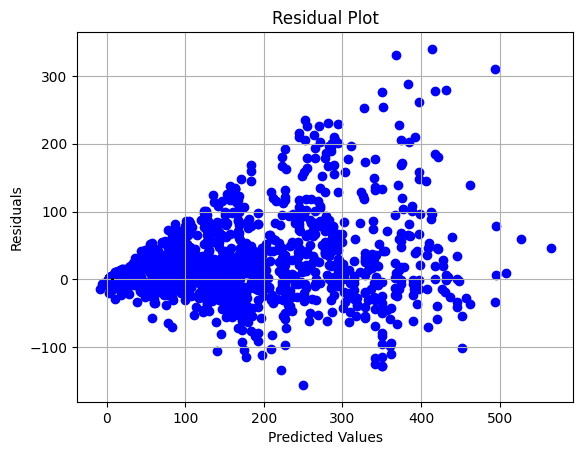

In [51]:
plt.scatter(pred, pred - test_y, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = 5, xmax = 9, color = 'black')   # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()  

## テストデータでの予測から提出ファイルの確認

In [ ]:
for c in test_x.columns:
    col_type = test_x[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        test_x[c] = test_x[c].astype('category')

In [55]:
#testデータの必要な変数だけをとりだす
test_df_x = test_df_one_hot_encoded[['hr','workingday','weekday2','temp','atemp','weathersit_1','weathersit_2','weathersit_3']]
test_df_x.head()

,hr,workingday,weekday2,temp,atemp,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.36,0.3788,1,0,0
1,1,0,0,0.36,0.3485,1,0,0
2,2,0,0,0.32,0.3485,1,0,0
3,3,0,0,0.30,0.3333,1,0,0
4,4,0,0,0.28,0.3030,1,0,0


In [56]:
test_pred = model.predict(test_df_x, num_iteration = model.best_iteration)
test_pred
print(len(test_pred))

8734


### 提出ファイルの作成

In [57]:
test_pred.shape,test_df.shape

((8734,), (8734, 14))

In [58]:
sub = test_df.copy()
sub['cnt'] = test_pred
sub.head(5)

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,91.487275
1,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,61.399107
2,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,44.581873
3,8649,2012-01-01,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,17.957066
4,8650,2012-01-01,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,3.579326


In [59]:
# 提出ファイル
sub[['id','cnt']].to_csv('sample_submit_10.csv', index=False, header = False)

In [60]:
sample_submit_10 = pd.read_csv('sample_submit_10.csv')
sample_submit_10.head()

,8646,91.48727464602779
0,8647,61.399107
1,8648,44.581873
2,8649,17.957066
3,8650,3.579326
4,8651,5.858761


### 評価  
RMSE  115.1929426(125/1246位)  
精度は高いとは言えないが、ligbtGBM(simple)に比べると、0.4ほどRMSEが小さくなり良くはなっている。  
